# Mortgage Loan prediction based on mortgage application. 

In [ ]:
num_vars=['loan_amount','population','applicant_income','minority_population_pct','ffiecmedian_family_income',
          'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units']

# Problem

### ---- Applying for mortgage can be a pain, after an individual files an application and go through all processes to later findout that his loan applciation was not approved. Also, it expensive for financial institution to purchase data with features such as credit score, debt to income ratio, and loan to value ratio. ----

# Objective

### --- In this exercise, we seek to use machine learning to predict if an applicant applying for mortgage loan will be accepted or otherwise. Also, we seek to establish that prediction of mortgage approval can be done without industry standard features such as credit score, debt to income ratio,loan to value ratio and the appraised value of the property for a loan to value ratio but rather use common imformation on loan applicantion given by applicant ---

In [1]:
#loading libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
%matplotlib widget
pd.set_option('display.max_columns', 50)


__author__ = "Frederick Emile Bondzie-Arthur"
__email__ = "Frederickauthur@hotmail.com"

## DISCOVER

### ---- Load the data ----

In [2]:
#load the train and test data into a Pandas dataframe
train_data= pd.read_csv("data/train_values.csv")
train_data_label= pd.read_csv("data/train_labels.csv")

final= pd.read_csv('data/test_values.csv')
final.shape

train_data.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  
0                         2642.0    4536         False  
1                         2108.0    2458         False  
2                         1048.0    5710         False  
3                         2299.0    5888          True  
4                         1847.0     289         False

### ---- Initial data exploration and Clean the data ----

In [3]:
#printing the first 5 rows of the train_label data
print(train_data_label.head())

   row_id  accepted
0       0         1
1       1         0
2       2         1
3       3         1
4       4         1


In [4]:
#printing the shape of both the train data and train_label data 
print(train_data.shape)
print(train_data_label.shape)

(500000, 22)
(500000, 2)


In [5]:
# merging the train data and the train_label data to form a new dataframe data.
data= train_data.merge(train_data_label, on='row_id')
data.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  
0                         2642.0    4536         False         1  
1                         2108.0    2458         False         0  
2                         1048.0    5710         False         1  
3                         2299.0    5888          True         1  
4                         1847.0     289         False         1

In [6]:
# checking if there are any ? in the train data 
print((data.astype(np.object) == '?').any())

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                        False
minority_population_pct           False
ffiecmedian_family_income         False
tract_to_msa_md_income_pct        False
number_of_owner-occupied_units    False
number_of_1_to_4_family_units     False
lender                            False
co_applicant                      False
accepted                          False
dtype: bool


In [7]:
# checking for missing values in the train data
print((data.astype(np.object).isnull()).any())

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                        False
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                   True
population                         True
minority_population_pct            True
ffiecmedian_family_income          True
tract_to_msa_md_income_pct         True
number_of_owner-occupied_units     True
number_of_1_to_4_family_units      True
lender                            False
co_applicant                      False
accepted                          False
dtype: bool


In [8]:
#checking the percentage of Null data in each column in train dataset  
(data.isnull().sum()/ data.row_id.unique().shape[0] * 100).round(2)

row_id                            0.00
loan_type                         0.00
property_type                     0.00
loan_purpose                      0.00
occupancy                         0.00
loan_amount                       0.00
preapproval                       0.00
msa_md                            0.00
state_code                        0.00
county_code                       0.00
applicant_ethnicity               0.00
applicant_race                    0.00
applicant_sex                     0.00
applicant_income                  7.99
population                        4.49
minority_population_pct           4.49
ffiecmedian_family_income         4.49
tract_to_msa_md_income_pct        4.50
number_of_owner-occupied_units    4.51
number_of_1_to_4_family_units     4.51
lender                            0.00
co_applicant                      0.00
accepted                          0.00
dtype: float64

In [9]:
#checking the percentage of Null data in each column in test dataset
(final.isnull().sum()/ final.row_id.unique().shape[0] * 100).round(2)

row_id                            0.00
loan_type                         0.00
property_type                     0.00
loan_purpose                      0.00
occupancy                         0.00
loan_amount                       0.00
preapproval                       0.00
msa_md                            0.00
state_code                        0.00
county_code                       0.00
applicant_ethnicity               0.00
applicant_race                    0.00
applicant_sex                     0.00
applicant_income                  8.03
population                        4.50
minority_population_pct           4.50
ffiecmedian_family_income         4.49
tract_to_msa_md_income_pct        4.50
number_of_owner-occupied_units    4.51
number_of_1_to_4_family_units     4.51
lender                            0.00
co_applicant                      0.00
dtype: float64

In [10]:
# checking for the total number of nulls in train data
data.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [11]:
# checking for the total number of nulls in test data
final.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [12]:
# checking for data with missing value as -1 in the "msa_md","county_code" and "state_code" columns
filter1 = data["msa_md"].isin([-1]) 
filter2 = data["county_code"].isin([-1]) 
filter3 = data["state_code"].isin([-1]) 

# displaying dataframe  with all filter applied and mandatory  
data[filter1 | filter2| filter3].head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
17      17          2              2             3          1        138.0   
26      26          1              1             1          1        113.0   
35      35          1              1             3          1        168.0   
38      38          1              1             1          2         88.0   
45      45          1              2             1          1        106.0   

    preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
17            3      -1          37           59                    2   
26            1      -1          -1           -1                    2   
35            3      -1          36          151                    2   
38            1      -1          -1           -1                    2   
45            3      -1          42          136                    3   

    applicant_race  applicant_sex  applicant_income  population  \
17               5              1               NaN      4193.0   
26               5              2              54.0         NaN   
35               5              2              65.0      3195.0   
38               5              2             104.0         NaN   
45               1              1              48.0         NaN   

    minority_population_pct  ffiecmedian_family_income  \
17                   14.996                    57774.0   
26                      NaN                        NaN   
35                   20.700                    47253.0   
38                      NaN                        NaN   
45                      NaN                        NaN   

    tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
17                      74.411                          1247.0   
26                         NaN                             NaN   
35                     100.000                           339.0   
38                         NaN                             NaN   
45                         NaN                             NaN   

    number_of_1_to_4_family_units  lender  co_applicant  accepted  
17                         1998.0    2566          True         1  
26                            NaN    2839         False         0  
35                          814.0    2597         False         1  
38                            NaN     788          True         0  
45                            NaN    2318          True         0

In [13]:
#checking for data with missing value as -1 count
print(data.msa_md[filter1].count())
print(data.county_code[filter2].count())
print(data.state_code[filter3].count())

76982
20466
19132


In [14]:
#checking the percentage of missing value indicated as -1 in data
print(round((data.msa_md[filter1].count()/data.row_id.unique().shape[0] * 100),2))
print(round((data.county_code[filter2].count()/data.row_id.unique().shape[0] * 100),2))
print(round((data.state_code[filter3].count()/data.row_id.unique().shape[0] * 100),2))

15.4
4.09
3.83


In [15]:
#checking for duplicate in train dataset. 
print('\n' + "Customer data")
print(data.shape)
print(data.row_id.unique().shape)


Customer data
(500000, 23)
(500000,)


In [16]:
# getting some descriptive statistics of the dataset including NA
data.describe().round(2)

row_id  loan_type  property_type  loan_purpose  occupancy  \
count  500000.00  500000.00      500000.00     500000.00  500000.00   
mean   249999.50       1.37           1.05          2.07       1.11   
std    144337.71       0.69           0.23          0.95       0.33   
min         0.00       1.00           1.00          1.00       1.00   
25%    124999.75       1.00           1.00          1.00       1.00   
50%    249999.50       1.00           1.00          2.00       1.00   
75%    374999.25       2.00           1.00          3.00       1.00   
max    499999.00       4.00           3.00          3.00       3.00   

       loan_amount  preapproval     msa_md  state_code  county_code  \
count    500000.00    500000.00  500000.00   500000.00    500000.00   
mean        221.75         2.76     181.61       23.73       144.54   
std         590.64         0.54     138.46       15.98       100.24   
min           1.00         1.00      -1.00       -1.00        -1.00   
25%          93.00         3.00      25.00        6.00        57.00   
50%         162.00         3.00     192.00       26.00       131.00   
75%         266.00         3.00     314.00       37.00       246.00   
max      100878.00         3.00     408.00       52.00       324.00   

       applicant_ethnicity  applicant_race  applicant_sex  applicant_income  \
count            500000.00       500000.00      500000.00         460052.00   
mean                  2.04            4.79           1.46            102.39   
std                   0.51            1.02           0.68            153.53   
min                   1.00            1.00           1.00              1.00   
25%                   2.00            5.00           1.00             47.00   
50%                   2.00            5.00           1.00             74.00   
75%                   2.00            5.00           2.00            117.00   
max                   4.00            7.00           4.00          10139.00   

       population  minority_population_pct  ffiecmedian_family_income  \
count   477535.00                477534.00                  477560.00   
mean      5416.83                    31.62                   69235.60   
std       2728.14                    26.33                   14810.06   
min         14.00                     0.53                   17858.00   
25%       3744.00                    10.70                   59731.00   
50%       4975.00                    22.90                   67526.00   
75%       6467.00                    46.02                   75351.00   
max      37097.00                   100.00                  125248.00   

       tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
count                   477486.00                       477435.00   
mean                        91.83                         1427.72   
std                         14.21                          737.56   
min                          3.98                            4.00   
25%                         88.07                          944.00   
50%                        100.00                         1327.00   
75%                        100.00                         1780.00   
max                        100.00                         8771.00   

       number_of_1_to_4_family_units     lender  accepted  
count                      477470.00  500000.00  500000.0  
mean                         1886.15    3720.12       0.5  
std                           914.12    1838.31       0.5  
min                             1.00       0.00       0.0  
25%                          1301.00    2442.00       0.0  
50%                          1753.00    3731.00       1.0  
75%                          2309.00    5436.00       1.0  
max                         13623.00    6508.00       1.0

In [17]:
# getting the median of each column in train data 
data_median= data.median()
data_median

row_id                            249999.500
loan_type                              1.000
property_type                          1.000
loan_purpose                           2.000
occupancy                              1.000
loan_amount                          162.000
preapproval                            3.000
msa_md                               192.000
state_code                            26.000
county_code                          131.000
applicant_ethnicity                    2.000
applicant_race                         5.000
applicant_sex                          1.000
applicant_income                      74.000
population                          4975.000
minority_population_pct               22.901
ffiecmedian_family_income          67526.000
tract_to_msa_md_income_pct           100.000
number_of_owner-occupied_units      1327.000
number_of_1_to_4_family_units       1753.000
lender                              3731.000
co_applicant                           0.000
accepted  

In [18]:
# getting the median of each column in test data 
final_median= final.median()
final_median

row_id                            249999.500
loan_type                              1.000
property_type                          1.000
loan_purpose                           2.000
occupancy                              1.000
loan_amount                          162.000
preapproval                            3.000
msa_md                               192.000
state_code                            26.000
county_code                          131.000
applicant_ethnicity                    2.000
applicant_race                         5.000
applicant_sex                          1.000
applicant_income                      74.000
population                          4975.000
minority_population_pct               22.955
ffiecmedian_family_income          67514.000
tract_to_msa_md_income_pct           100.000
number_of_owner-occupied_units      1326.000
number_of_1_to_4_family_units       1753.000
lender                              3713.000
co_applicant                           0.000
dtype: flo

In [19]:
# filling NA in test data  with median of test data
data.fillna(data_median,inplace=True)
data.shape

(500000, 23)

In [20]:
# filling NA in train data with median of train data
final.fillna(data_median,inplace=True)
final.shape

(500000, 22)

In [21]:
#rechecking the percentage of Null data in each column in test data
(data.isnull().sum()/ data.row_id.unique().shape[0] * 100).round(2)

row_id                            0.0
loan_type                         0.0
property_type                     0.0
loan_purpose                      0.0
occupancy                         0.0
loan_amount                       0.0
preapproval                       0.0
msa_md                            0.0
state_code                        0.0
county_code                       0.0
applicant_ethnicity               0.0
applicant_race                    0.0
applicant_sex                     0.0
applicant_income                  0.0
population                        0.0
minority_population_pct           0.0
ffiecmedian_family_income         0.0
tract_to_msa_md_income_pct        0.0
number_of_owner-occupied_units    0.0
number_of_1_to_4_family_units     0.0
lender                            0.0
co_applicant                      0.0
accepted                          0.0
dtype: float64

In [22]:
#rechecking the percentage of Null data in each column in train dataset
(final.isnull().sum()/ final.row_id.unique().shape[0] * 100).round(2)

row_id                            0.0
loan_type                         0.0
property_type                     0.0
loan_purpose                      0.0
occupancy                         0.0
loan_amount                       0.0
preapproval                       0.0
msa_md                            0.0
state_code                        0.0
county_code                       0.0
applicant_ethnicity               0.0
applicant_race                    0.0
applicant_sex                     0.0
applicant_income                  0.0
population                        0.0
minority_population_pct           0.0
ffiecmedian_family_income         0.0
tract_to_msa_md_income_pct        0.0
number_of_owner-occupied_units    0.0
number_of_1_to_4_family_units     0.0
lender                            0.0
co_applicant                      0.0
dtype: float64

### ----  Explore the data (EDA) ----

In [23]:
#performing summary statistics after cleaning datasets
data.describe().round(2)

row_id  loan_type  property_type  loan_purpose  occupancy  \
count  500000.00  500000.00      500000.00     500000.00  500000.00   
mean   249999.50       1.37           1.05          2.07       1.11   
std    144337.71       0.69           0.23          0.95       0.33   
min         0.00       1.00           1.00          1.00       1.00   
25%    124999.75       1.00           1.00          1.00       1.00   
50%    249999.50       1.00           1.00          2.00       1.00   
75%    374999.25       2.00           1.00          3.00       1.00   
max    499999.00       4.00           3.00          3.00       3.00   

       loan_amount  preapproval     msa_md  state_code  county_code  \
count    500000.00    500000.00  500000.00   500000.00    500000.00   
mean        221.75         2.76     181.61       23.73       144.54   
std         590.64         0.54     138.46       15.98       100.24   
min           1.00         1.00      -1.00       -1.00        -1.00   
25%          93.00         3.00      25.00        6.00        57.00   
50%         162.00         3.00     192.00       26.00       131.00   
75%         266.00         3.00     314.00       37.00       246.00   
max      100878.00         3.00     408.00       52.00       324.00   

       applicant_ethnicity  applicant_race  applicant_sex  applicant_income  \
count            500000.00       500000.00      500000.00         500000.00   
mean                  2.04            4.79           1.46            100.12   
std                   0.51            1.02           0.68            147.47   
min                   1.00            1.00           1.00              1.00   
25%                   2.00            5.00           1.00             49.00   
50%                   2.00            5.00           1.00             74.00   
75%                   2.00            5.00           2.00            112.00   
max                   4.00            7.00           4.00          10139.00   

       population  minority_population_pct  ffiecmedian_family_income  \
count   500000.00                500000.00                  500000.00   
mean      5396.98                    31.23                   69158.88   
std       2667.72                    25.80                   14478.23   
min         14.00                     0.53                   17858.00   
25%       3805.00                    11.19                   60071.00   
50%       4975.00                    22.90                   67526.00   
75%       6379.00                    44.49                   74714.25   
max      37097.00                   100.00                  125248.00   

       tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
count                   500000.00                       500000.00   
mean                        92.20                         1423.17   
std                         13.99                          721.03   
min                          3.98                            4.00   
25%                         89.14                          963.00   
50%                        100.00                         1327.00   
75%                        100.00                         1754.00   
max                        100.00                         8771.00   

       number_of_1_to_4_family_units     lender  accepted  
count                      500000.00  500000.00  500000.0  
mean                         1880.15    3720.12       0.5  
std                           893.72    1838.31       0.5  
min                             1.00       0.00       0.0  
25%                          1323.00    2442.00       0.0  
50%                          1753.00    3731.00       1.0  
75%                          2275.00    5436.00       1.0  
max                         13623.00    6508.00       1.0

### Feature engineering for train dataset
#### Here we extract some features from the dataset and add to the datasets 

In [24]:
#Feature engineering is done on test data
#caculating the loan amount per applicant ratio LAPDR 
data['LDPR']= (data['applicant_income'])/ (data['loan_amount'])
#caculating the lenders x loantype 
data['LLT']= (data['lender'])* (data['loan_type'])
# caculating the property x loan purpose
data['PTLP']= (data['property_type'])* (data['loan_purpose'])

In [25]:
#Feature engineering is done on train data
#caculating the loan amount per applicant ratio LAPDR
final['LDPR']= (final['applicant_income'])/ (final['loan_amount'])
#caculating the lenders x loantype
final['LLT']= (final['lender'])* (final['loan_type'])
# caculating the property x loan purpose
final['PTLP']= (final['property_type'])* (final['loan_purpose'])

In [26]:
# Calculating for mean acceptance rate per Metropolitan Statistical/Metro. Divsion.
#ie.msd_md acceptance Rate Mean on test data

MSDARM= pd.DataFrame(data.groupby(["msa_md"])["accepted"].mean()) 
MSDARM.shape

(409, 1)

In [27]:
# Calculating for mean acceptance rate per lender. ie.Lender acceptance Rate Mean and merging with tain dataset
#train dataset
LARM= pd.DataFrame(data.groupby(['lender'])['accepted'].mean())
data= pd.merge(data,LARM,how='left', on='lender')

In [28]:
# merging test data with mean acceptance rate per lender. 
final= pd.merge(final,LARM,how='left', on='lender')

In [29]:
#checking for columns of train dataset to see if column names changed 
data.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted_x', 'LDPR', 'LLT', 'PTLP',
       'accepted_y'],
      dtype='object')

In [30]:
#checking for columns of test dataset to see if column names changed 
final.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'LDPR', 'LLT', 'PTLP', 'accepted'],
      dtype='object')

In [31]:
# Renaming test data columns since to a standard
data.columns = ['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy','loan_amount', 
                'preapproval', 'msa_md', 'state_code', 'county_code','applicant_ethnicity',
                'applicant_race', 'applicant_sex','applicant_income', 'population', 
                'minority_population_pct','ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
                'number_of_owner-occupied_units', 'number_of_1_to_4_family_units','lender',
                'co_applicant', 'accepted', 'LDPR','LLT','PTLP','LARM']

In [32]:
# Renaming train data columns since to a standard
final.columns = ['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy','loan_amount', 
                'preapproval', 'msa_md', 'state_code', 'county_code','applicant_ethnicity',
                'applicant_race', 'applicant_sex','applicant_income', 'population', 
                'minority_population_pct','ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
                'number_of_owner-occupied_units', 'number_of_1_to_4_family_units','lender',
                'co_applicant', 'LDPR','LLT','PTLP','LARM']

In [33]:
# merging train data with mean acceptance rate per Metropolitan Statistical/Metro. Divsion.
data= pd.merge(data,MSDARM,how='left', on='msa_md')

In [34]:
# merging test data with mean acceptance rate per Metropolitan Statistical/Metro. Divsion.
final= pd.merge(final,MSDARM,how='left', on='msa_md')

In [35]:
# Renaming train data columns since to a standard
data.columns = ['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy','loan_amount', 
                'preapproval', 'msa_md', 'state_code', 'county_code','applicant_ethnicity',
                'applicant_race', 'applicant_sex','applicant_income', 'population', 
                'minority_population_pct','ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
                'number_of_owner-occupied_units', 'number_of_1_to_4_family_units','lender',
                'co_applicant', 'accepted', 'LDPR','LLT','PTLP','LARM','MSDARM']

In [36]:
# Renaming test data columns since to a standard
final.columns = ['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy','loan_amount', 
                'preapproval', 'msa_md', 'state_code', 'county_code','applicant_ethnicity',
                'applicant_race', 'applicant_sex','applicant_income', 'population', 
                'minority_population_pct','ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
                'number_of_owner-occupied_units', 'number_of_1_to_4_family_units','lender',
                'co_applicant', 'LDPR','LLT','PTLP','LARM','MSDARM']

In [37]:
#printing a concise summary of a train datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 28 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 no

In [38]:
#printing a concise summary of a test datasets
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 27 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 no

In [39]:
# Printing for total loan accepted and loan not accepted
is_loan_accepted= data.accepted== 1
loan_accepted= data[is_loan_accepted]
loan_is_not_accepted= data.accepted== 0
loan_not_accepted= data[loan_is_not_accepted]

print(loan_accepted.shape)
print(loan_not_accepted.shape)

(250114, 28)
(249886, 28)


In [40]:
# grouping categorical and numerical columns into seperate list. 
cat_vars=['loan_type','property_type','loan_purpose','occupancy','preapproval','applicant_sex','co_applicant',
         'applicant_sex','applicant_race','applicant_ethnicity','msa_md','state_code','county_code']
num_vars=['loan_amount','population','applicant_income','minority_population_pct','ffiecmedian_family_income',
          'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units',
         'LDPR','LLT','PTLP','LARM','MSDARM']

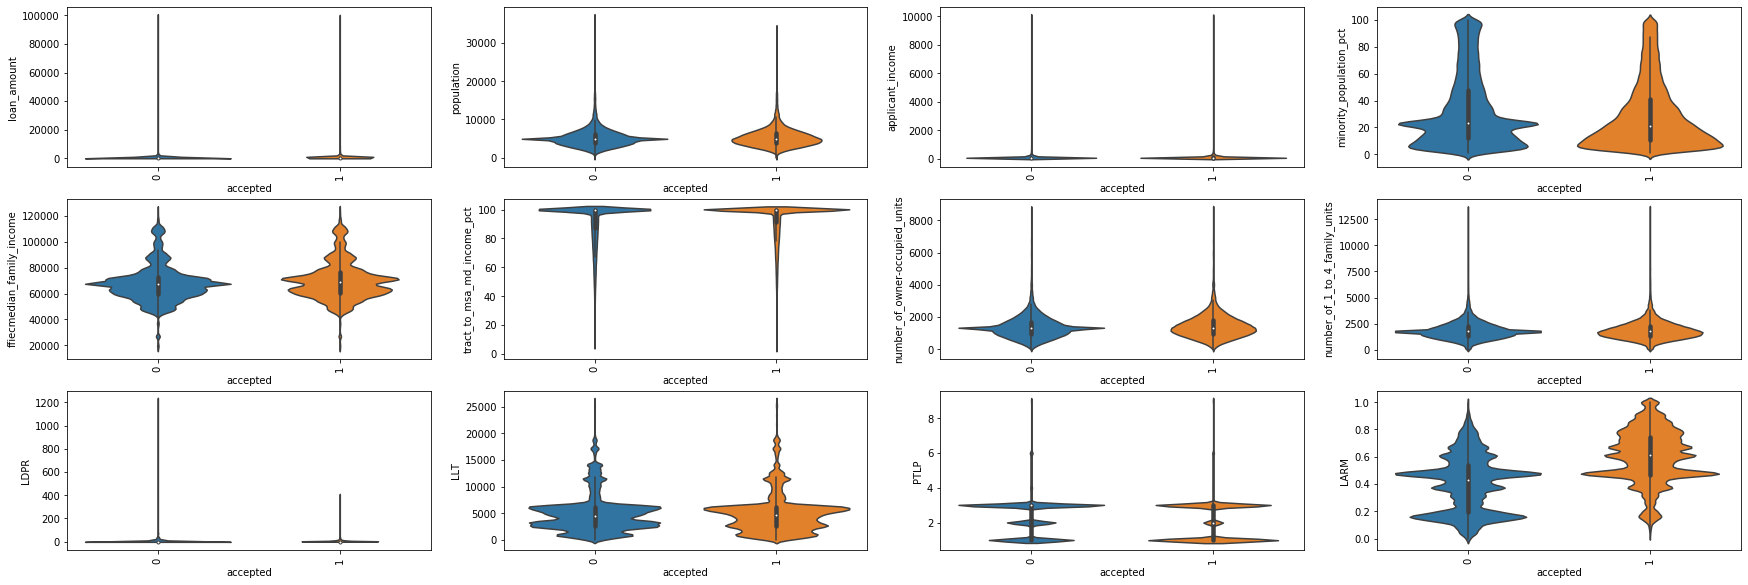

In [41]:
## define function for plotting box violin
def plot_voilin(combined, cols, col_x= 'accepted'):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 10))
    for col, subplot in zip(cols, ax.flatten()):
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=combined,ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)
        

#voilin plot for numerical variable 
plot_voilin(data, num_vars)
plt.savefig('image1.png')

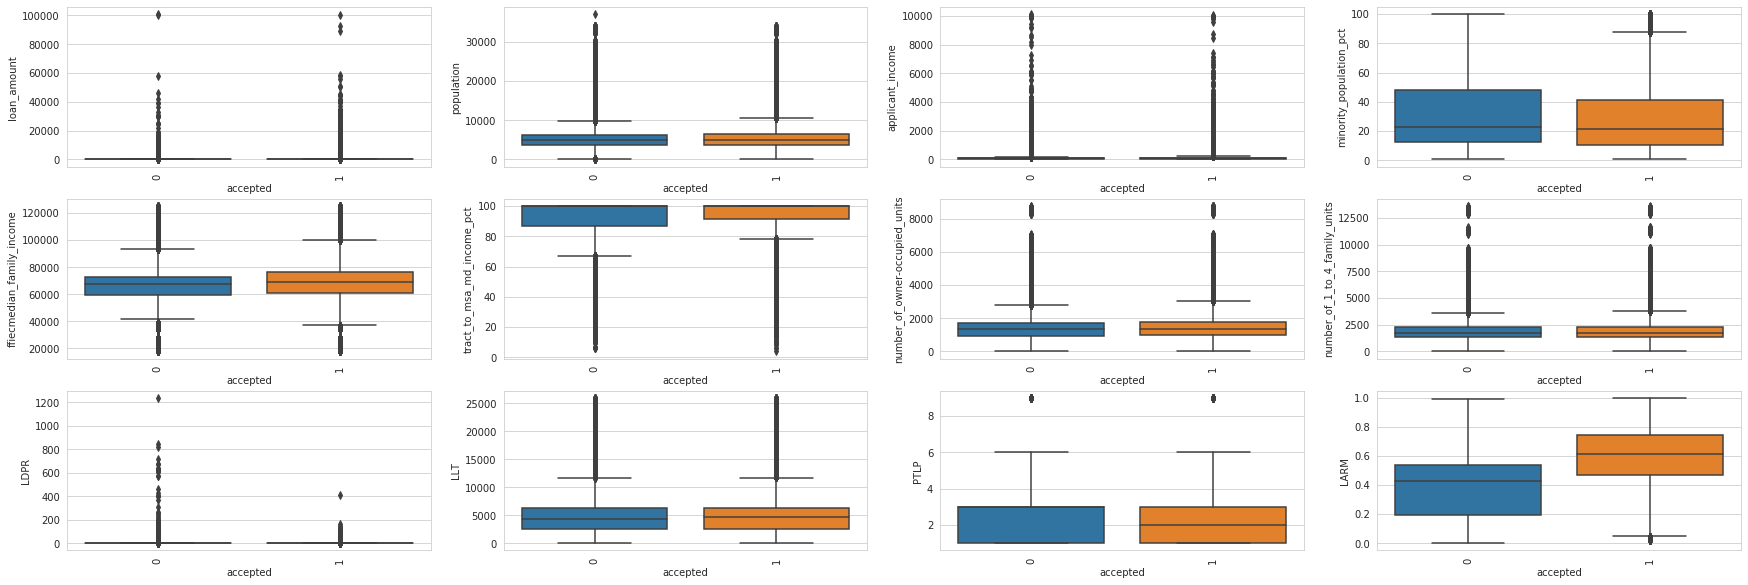

In [42]:
# define function for plotting box plot 
def plot_box(combined, cols, col_x= 'accepted'):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 10))
    for col, subplot in zip(cols, ax.flatten()):
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=combined,ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)
        
#voilin plot for numerical variable 
plot_box(data, num_vars)
plt.savefig('image2.png')

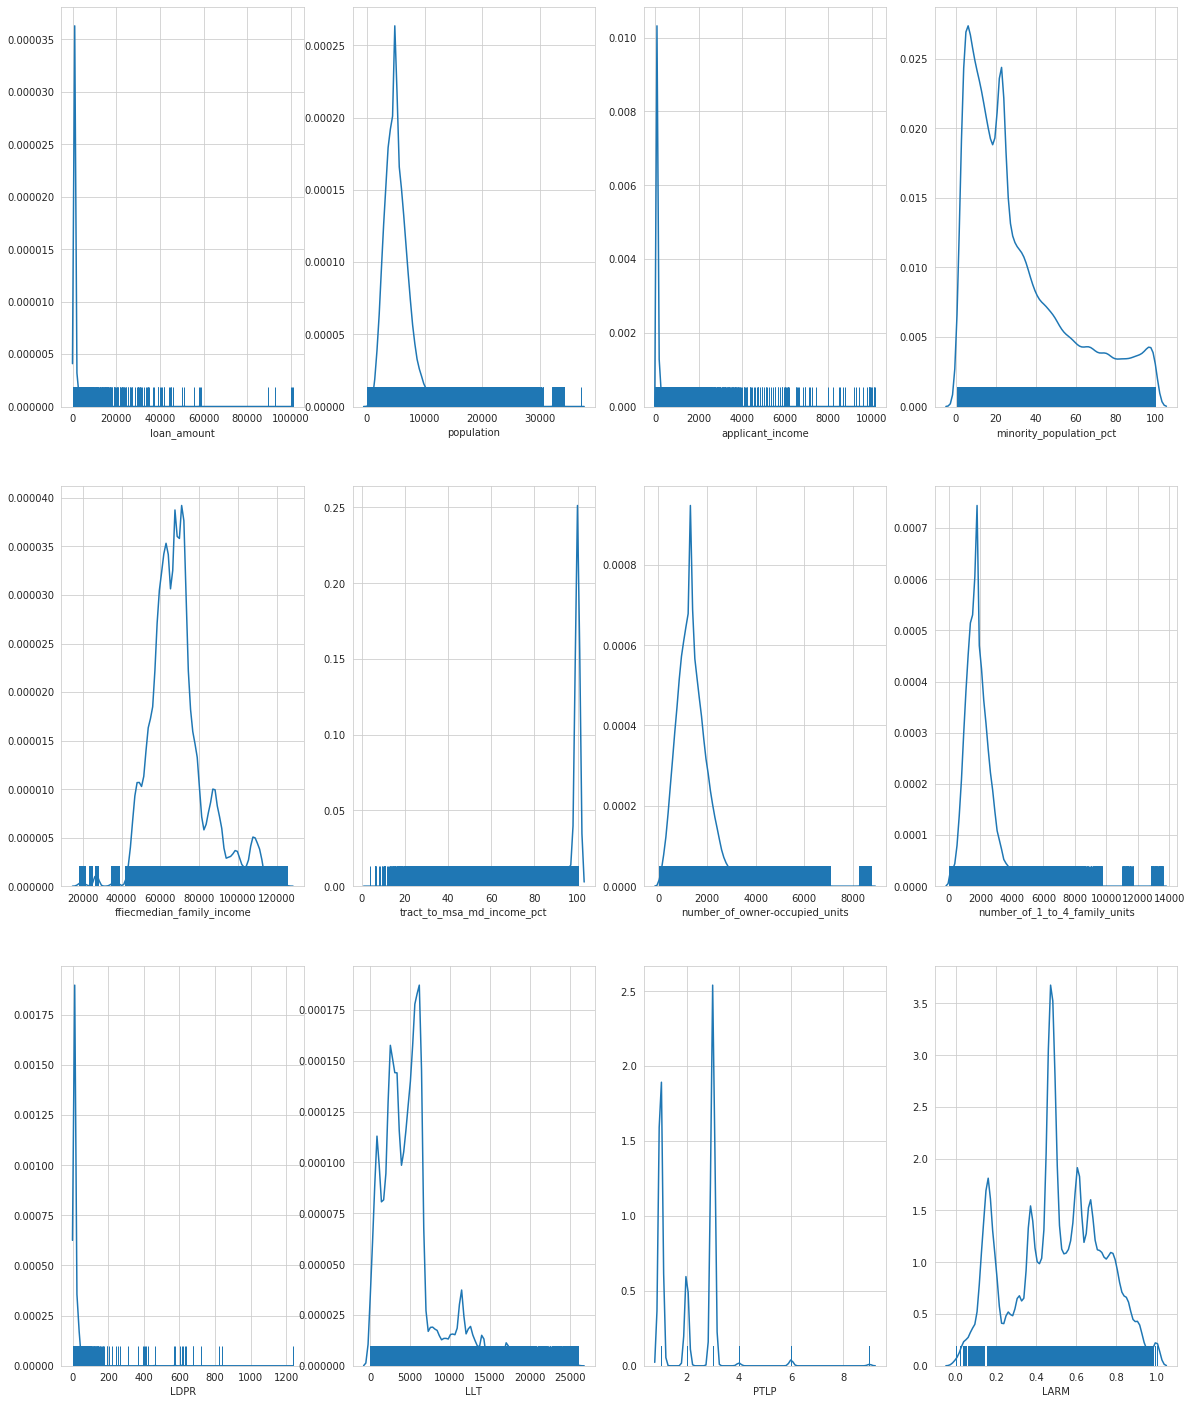

In [43]:
## define function for plotting Kernel Density Estimation (KDE) plots provides a smooth denisty curve of data values
def plot_den_hist(combined, cols, bins=10, hist= False):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 25))
    for col, subplot in zip(cols, ax.flatten()):
        sns.distplot(combined[col], bins= bins, rug=True, hist=hist, ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(0)

#KDE plot for numerical variable, histogram not enabled
plot_den_hist(data, num_vars) 
plt.savefig('image3.png')

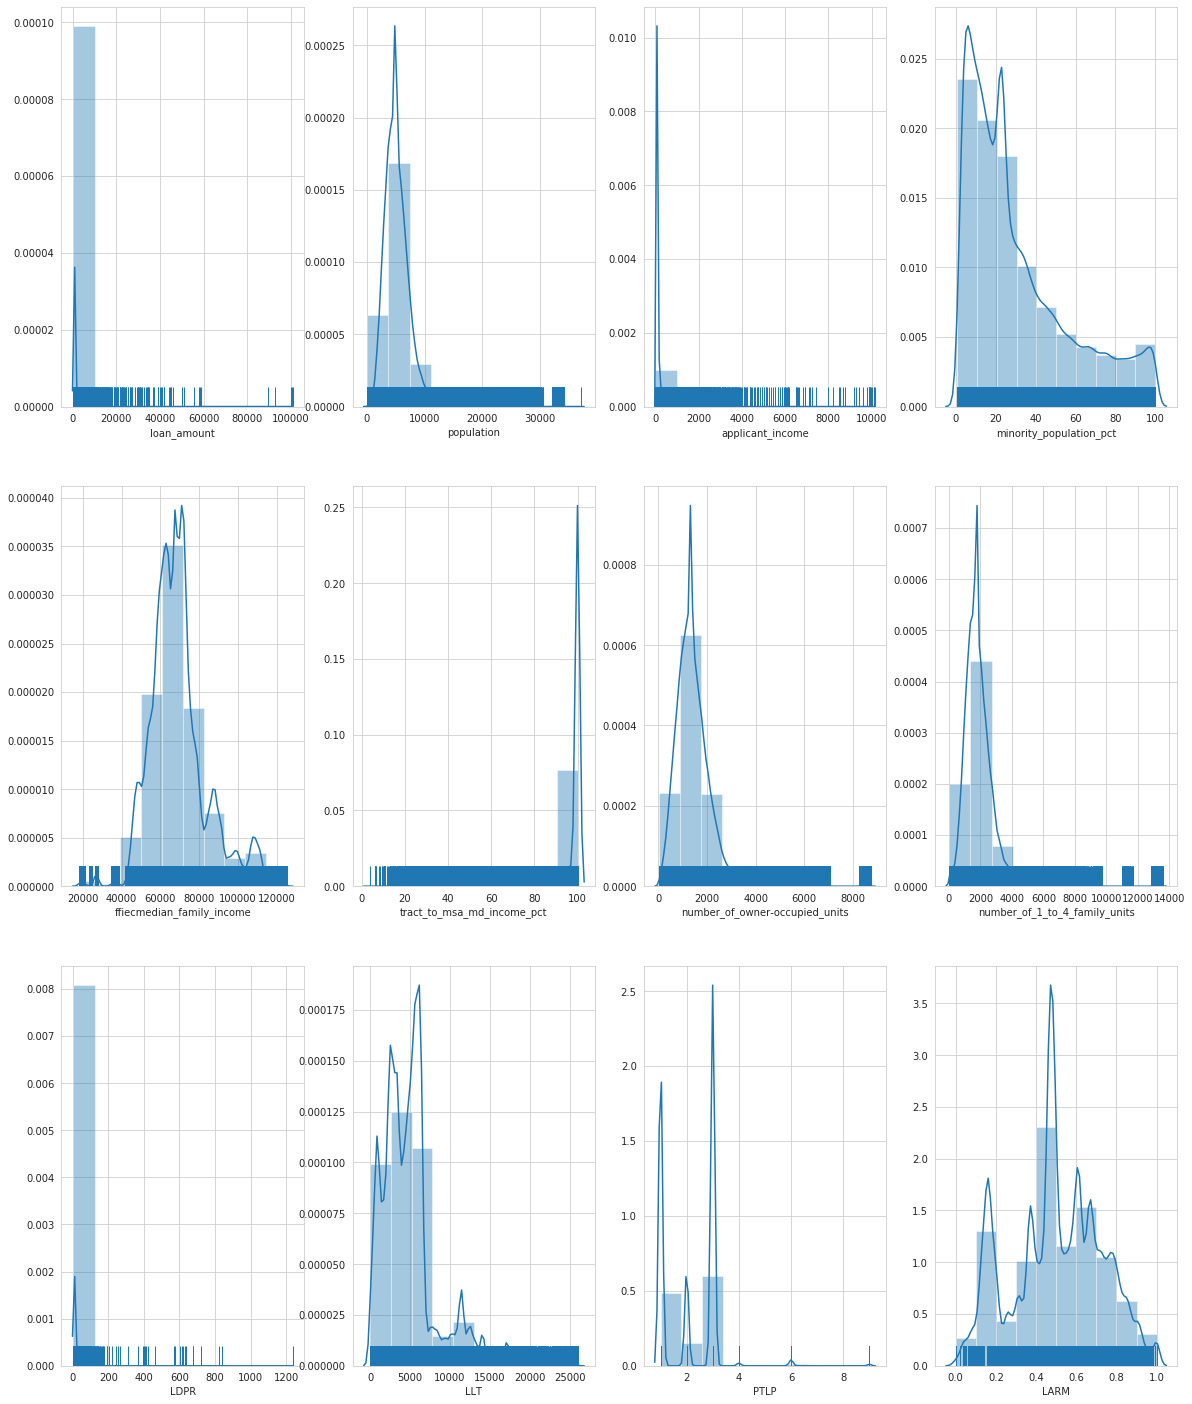

In [50]:
#KDE plot for numerical variable, histogram enabled
plot_den_hist(data, num_vars, hist=True)
plt.savefig('image3b.png')

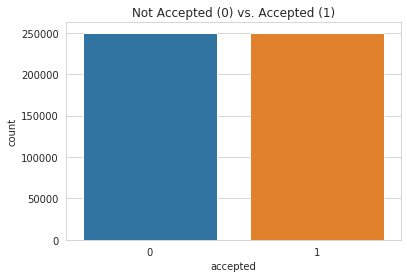

In [45]:
# count plot for mortgage loan accepted and the once not 
sns.countplot('accepted', data = data)
plt.title('Not Accepted (0) vs. Accepted (1)')
plt.savefig('image4.png')

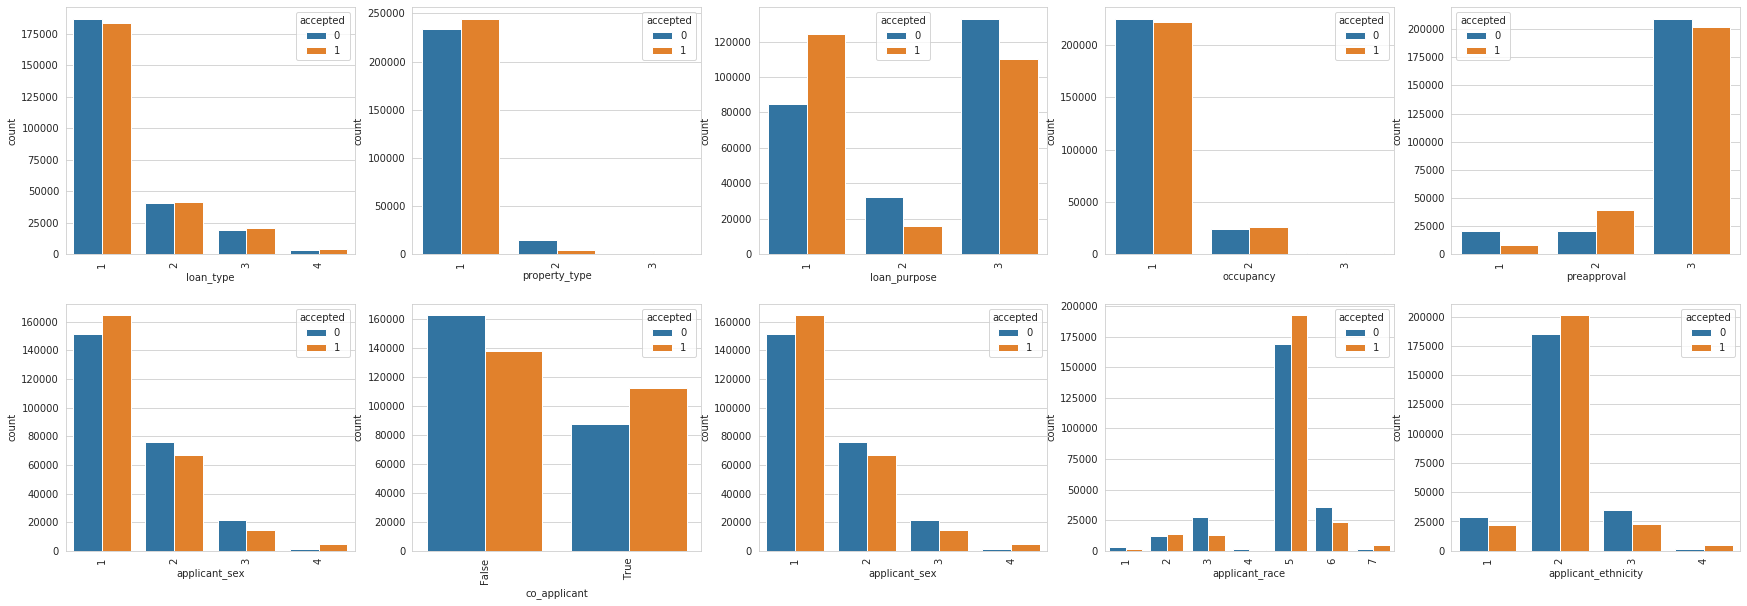

In [46]:
# creating barplot function for categorical variable 
def plot_bar(cat_cols):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))
    for col, subplot in zip(cat_cols, ax.flatten()):
        sns.countplot(data[col],hue=data['accepted'],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

# plotting bar graph for categorical variables 
plot_bar(cat_vars)   
plt.savefig('image5.png')

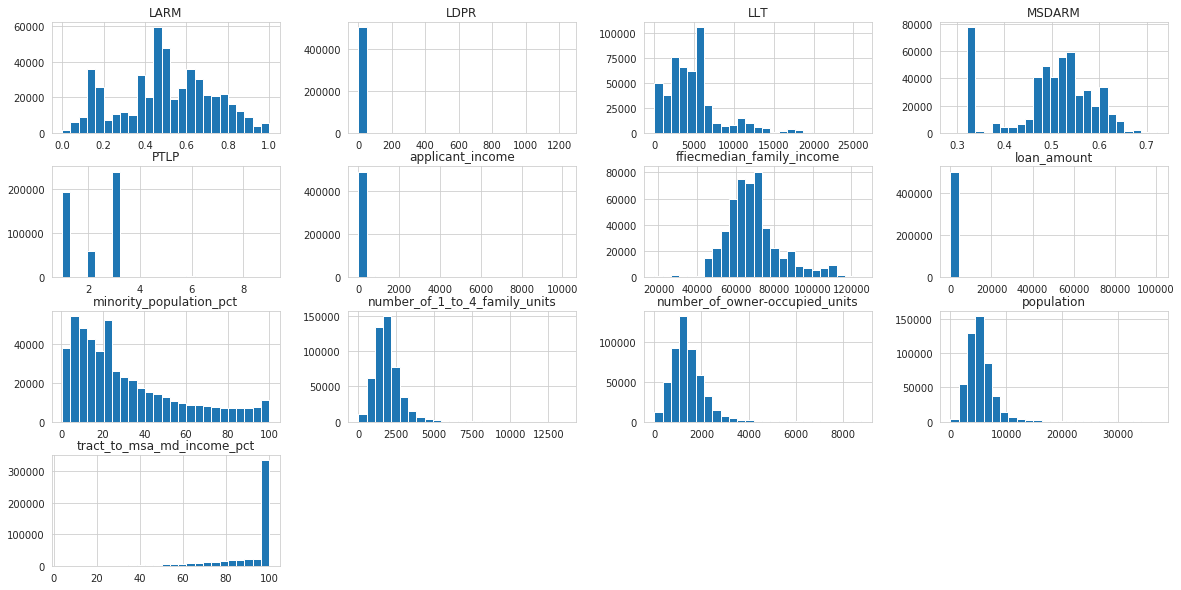

In [47]:
#plotting histogram numerical variables
data[num_vars].hist(bins=25, figsize=(20, 10), layout=(4, 4));
plt.savefig('image6.png')

From the graph, it can be seen that all data features are skwed except the ffiecmedian_family_income. To fix this issue we apply log to the data features skewed. 

Skewness is the measure of symmetry of a distrubution. 
For a normal distubution skewness=0 and thus it is symmetrical. 
When data is skewed towards the right, then it is a postive skew otherwise is viceversa. 

1. Skewness between 0 to $\pm$ 5= acceptable
2. Skewness between $\pm$ 0.5 to $\pm$ 1= a problem 
3. skewness between $\pm$ 1 or more= utmost

In [41]:
# measuring how skewed the data is ?
data.skew(axis=0)

row_id                            1.286588e-17
loan_type                         1.864712e+00
property_type                     5.196600e+00
loan_purpose                     -1.333652e-01
occupancy                         2.871840e+00
loan_amount                       7.655279e+01
preapproval                      -2.242003e+00
msa_md                            1.353241e-02
state_code                       -5.974008e-02
county_code                       2.309361e-01
applicant_ethnicity               5.802958e-01
applicant_race                   -1.583676e+00
applicant_sex                     1.370674e+00
applicant_income                  2.317498e+01
population                        2.947782e+00
minority_population_pct           1.068839e+00
ffiecmedian_family_income         8.063549e-01
tract_to_msa_md_income_pct       -2.035543e+00
number_of_owner-occupied_units    1.942059e+00
number_of_1_to_4_family_units     2.080321e+00
lender                           -2.196283e-01
co_applicant 

In [42]:
# kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
# measuring kurtosis 
data.kurtosis(axis=0)

row_id                               -1.200000
loan_type                             2.707997
property_type                        29.022540
loan_purpose                         -1.874865
occupancy                             7.561584
loan_amount                        9385.071465
preapproval                           3.913370
msa_md                               -1.491417
state_code                           -1.361784
county_code                          -1.234460
applicant_ethnicity                   2.691639
applicant_race                        2.661800
applicant_sex                         1.370864
applicant_income                   1062.740924
population                           18.060147
minority_population_pct               0.179010
ffiecmedian_family_income             1.302638
tract_to_msa_md_income_pct            3.749475
number_of_owner-occupied_units        9.540237
number_of_1_to_4_family_units        12.029859
lender                               -1.105622
co_applicant 

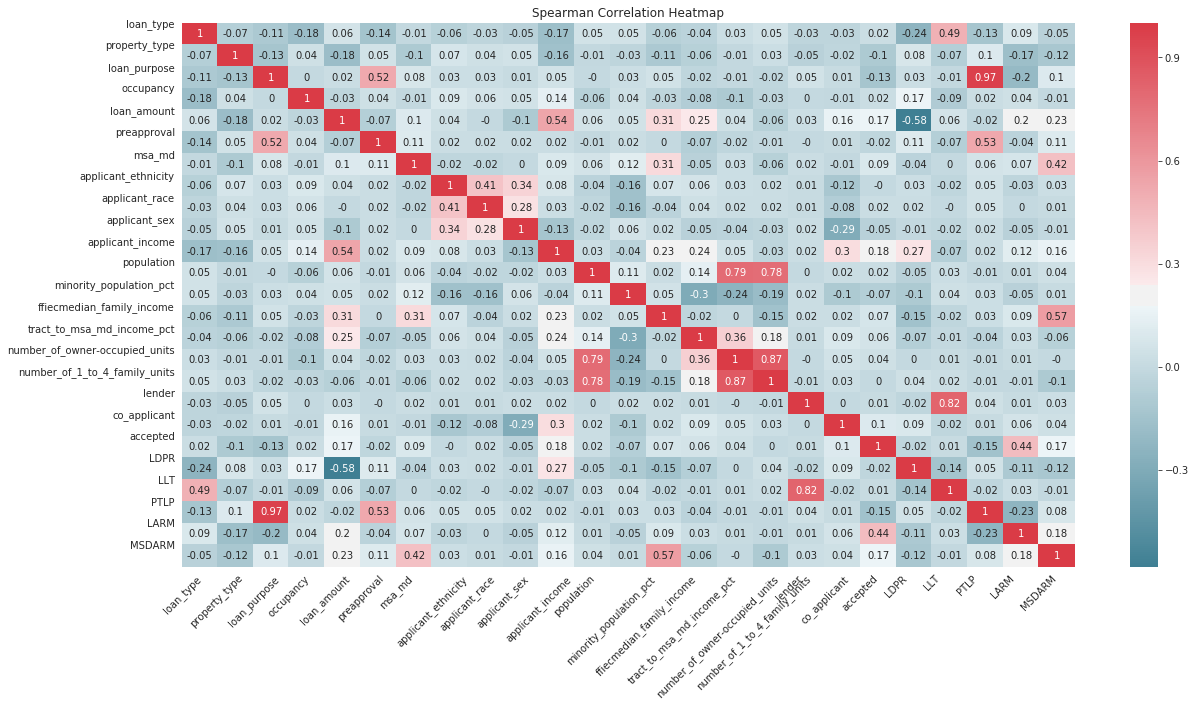

<Figure size 432x288 with 0 Axes>

In [51]:
# correlation between selected numerical variables and response 
corr=data.drop(['row_id','county_code','state_code'], axis=1).corr(method='spearman').round(2)
fig= plt.figure(figsize=(20,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True)
plt.xticks(rotation=45)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Spearman Correlation Heatmap')
plt.show()
plt.savefig('image7.png')

In [52]:
#displaying the correlation values 
corr.style.background_gradient().set_precision(2)

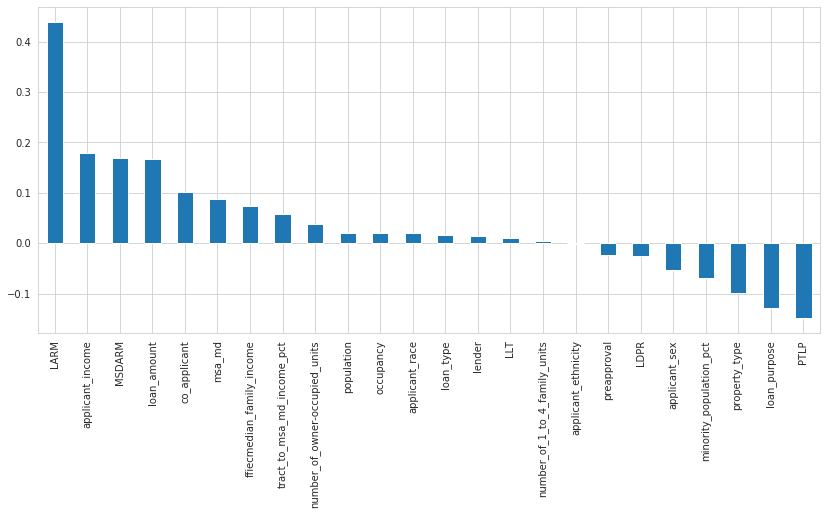

<Figure size 432x288 with 0 Axes>

In [53]:
# plotting a histogram of correlation with it effect to reponse
corr_with_acc=data.drop(['row_id','county_code','state_code'], axis=1).corr(method='spearman')['accepted'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_acc.drop("accepted").plot.bar()
plt.show()
plt.savefig('image8.png')

In [43]:
# witing a function for correlation between the catergoroical data against the target variable using the cramer's V
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# function to print categorical variables after running it through the cramers_v dunction
def print_crammer_values(data, cat_features, cats_x= 'accepted'):
    for cat_ in cat_features:
        print(cat_+ ": "+ str(cramers_v(data[cat_],data[cats_x]).round(2)))
        
# calculating for correlation between categorical variable and target variable        
print_crammer_values(data, cat_vars)

loan_type: 0.02
property_type: 0.11
loan_purpose: 0.17
occupancy: 0.03
preapproval: 0.15
applicant_sex: 0.09
co_applicant: 0.1
applicant_sex: 0.09
applicant_race: 0.15
applicant_ethnicity: 0.11
msa_md: 0.17
state_code: 0.21
county_code: 0.2


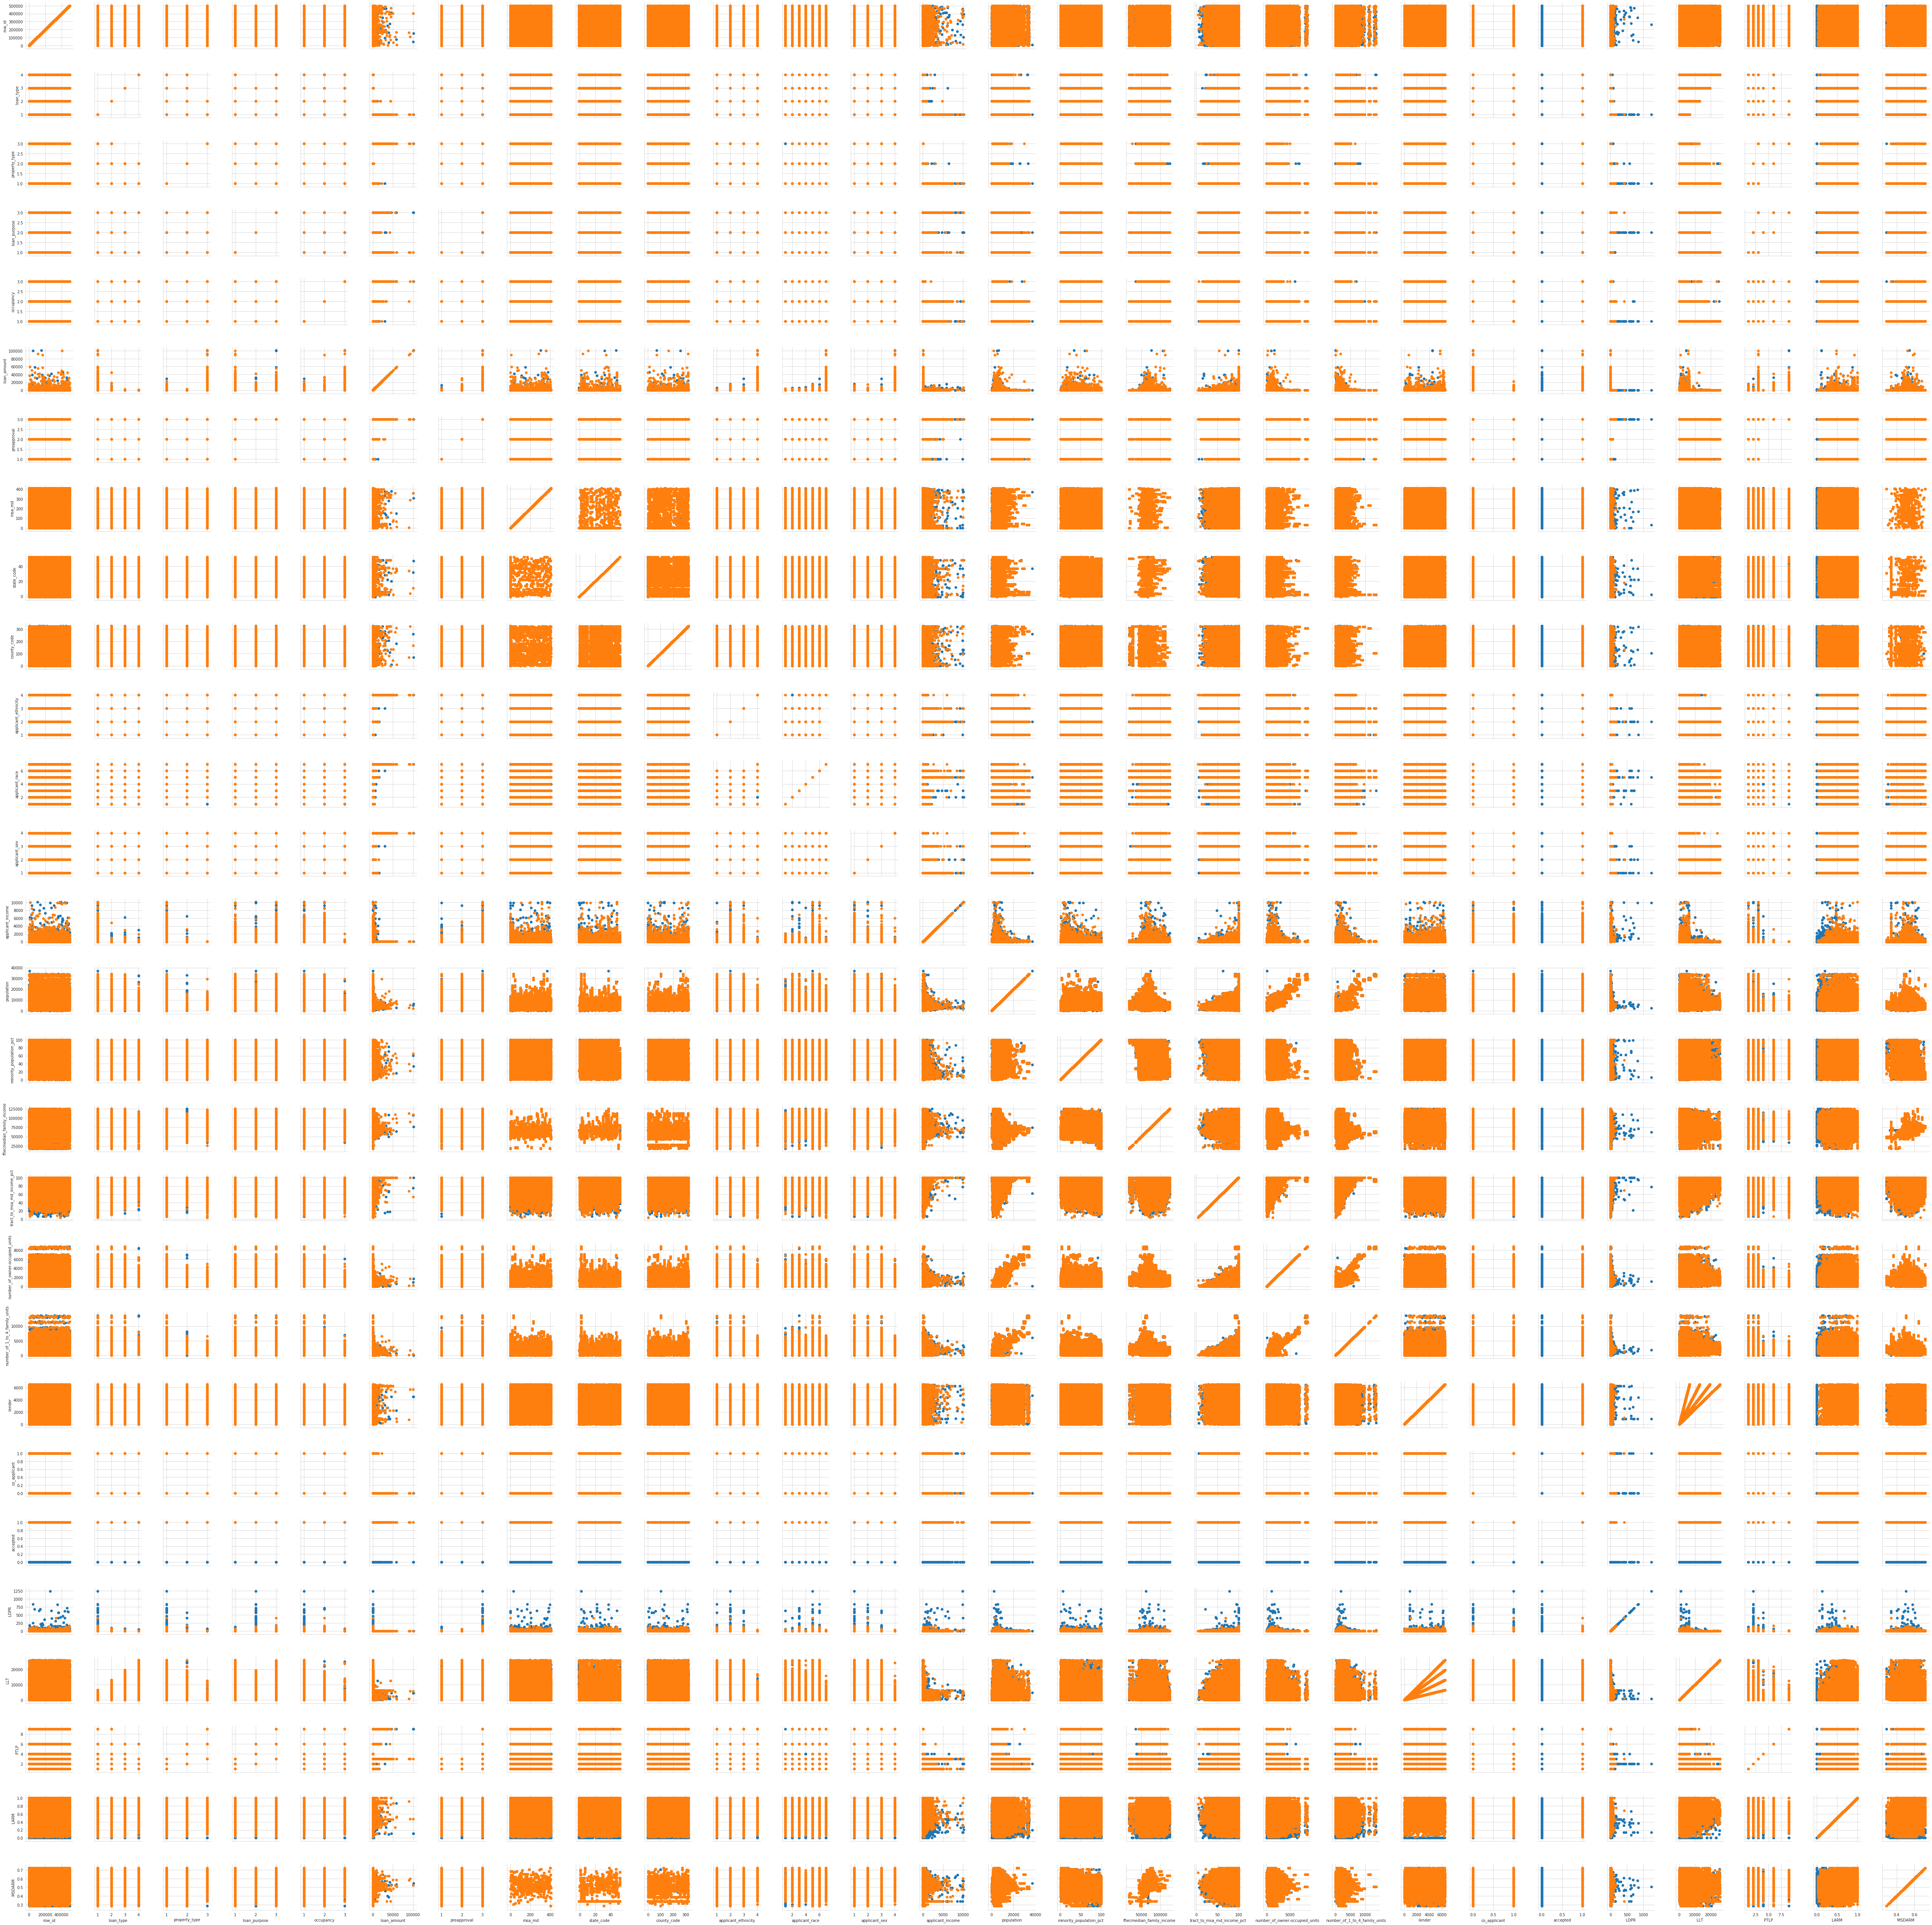

In [57]:
# pairwise plot for all variable origanal variable
%config InlineBackend.figure_format = 'png' 
g= sns.PairGrid(data=data, hue="accepted")
g.map(plt.scatter)  
plt.savefig('image9.png')

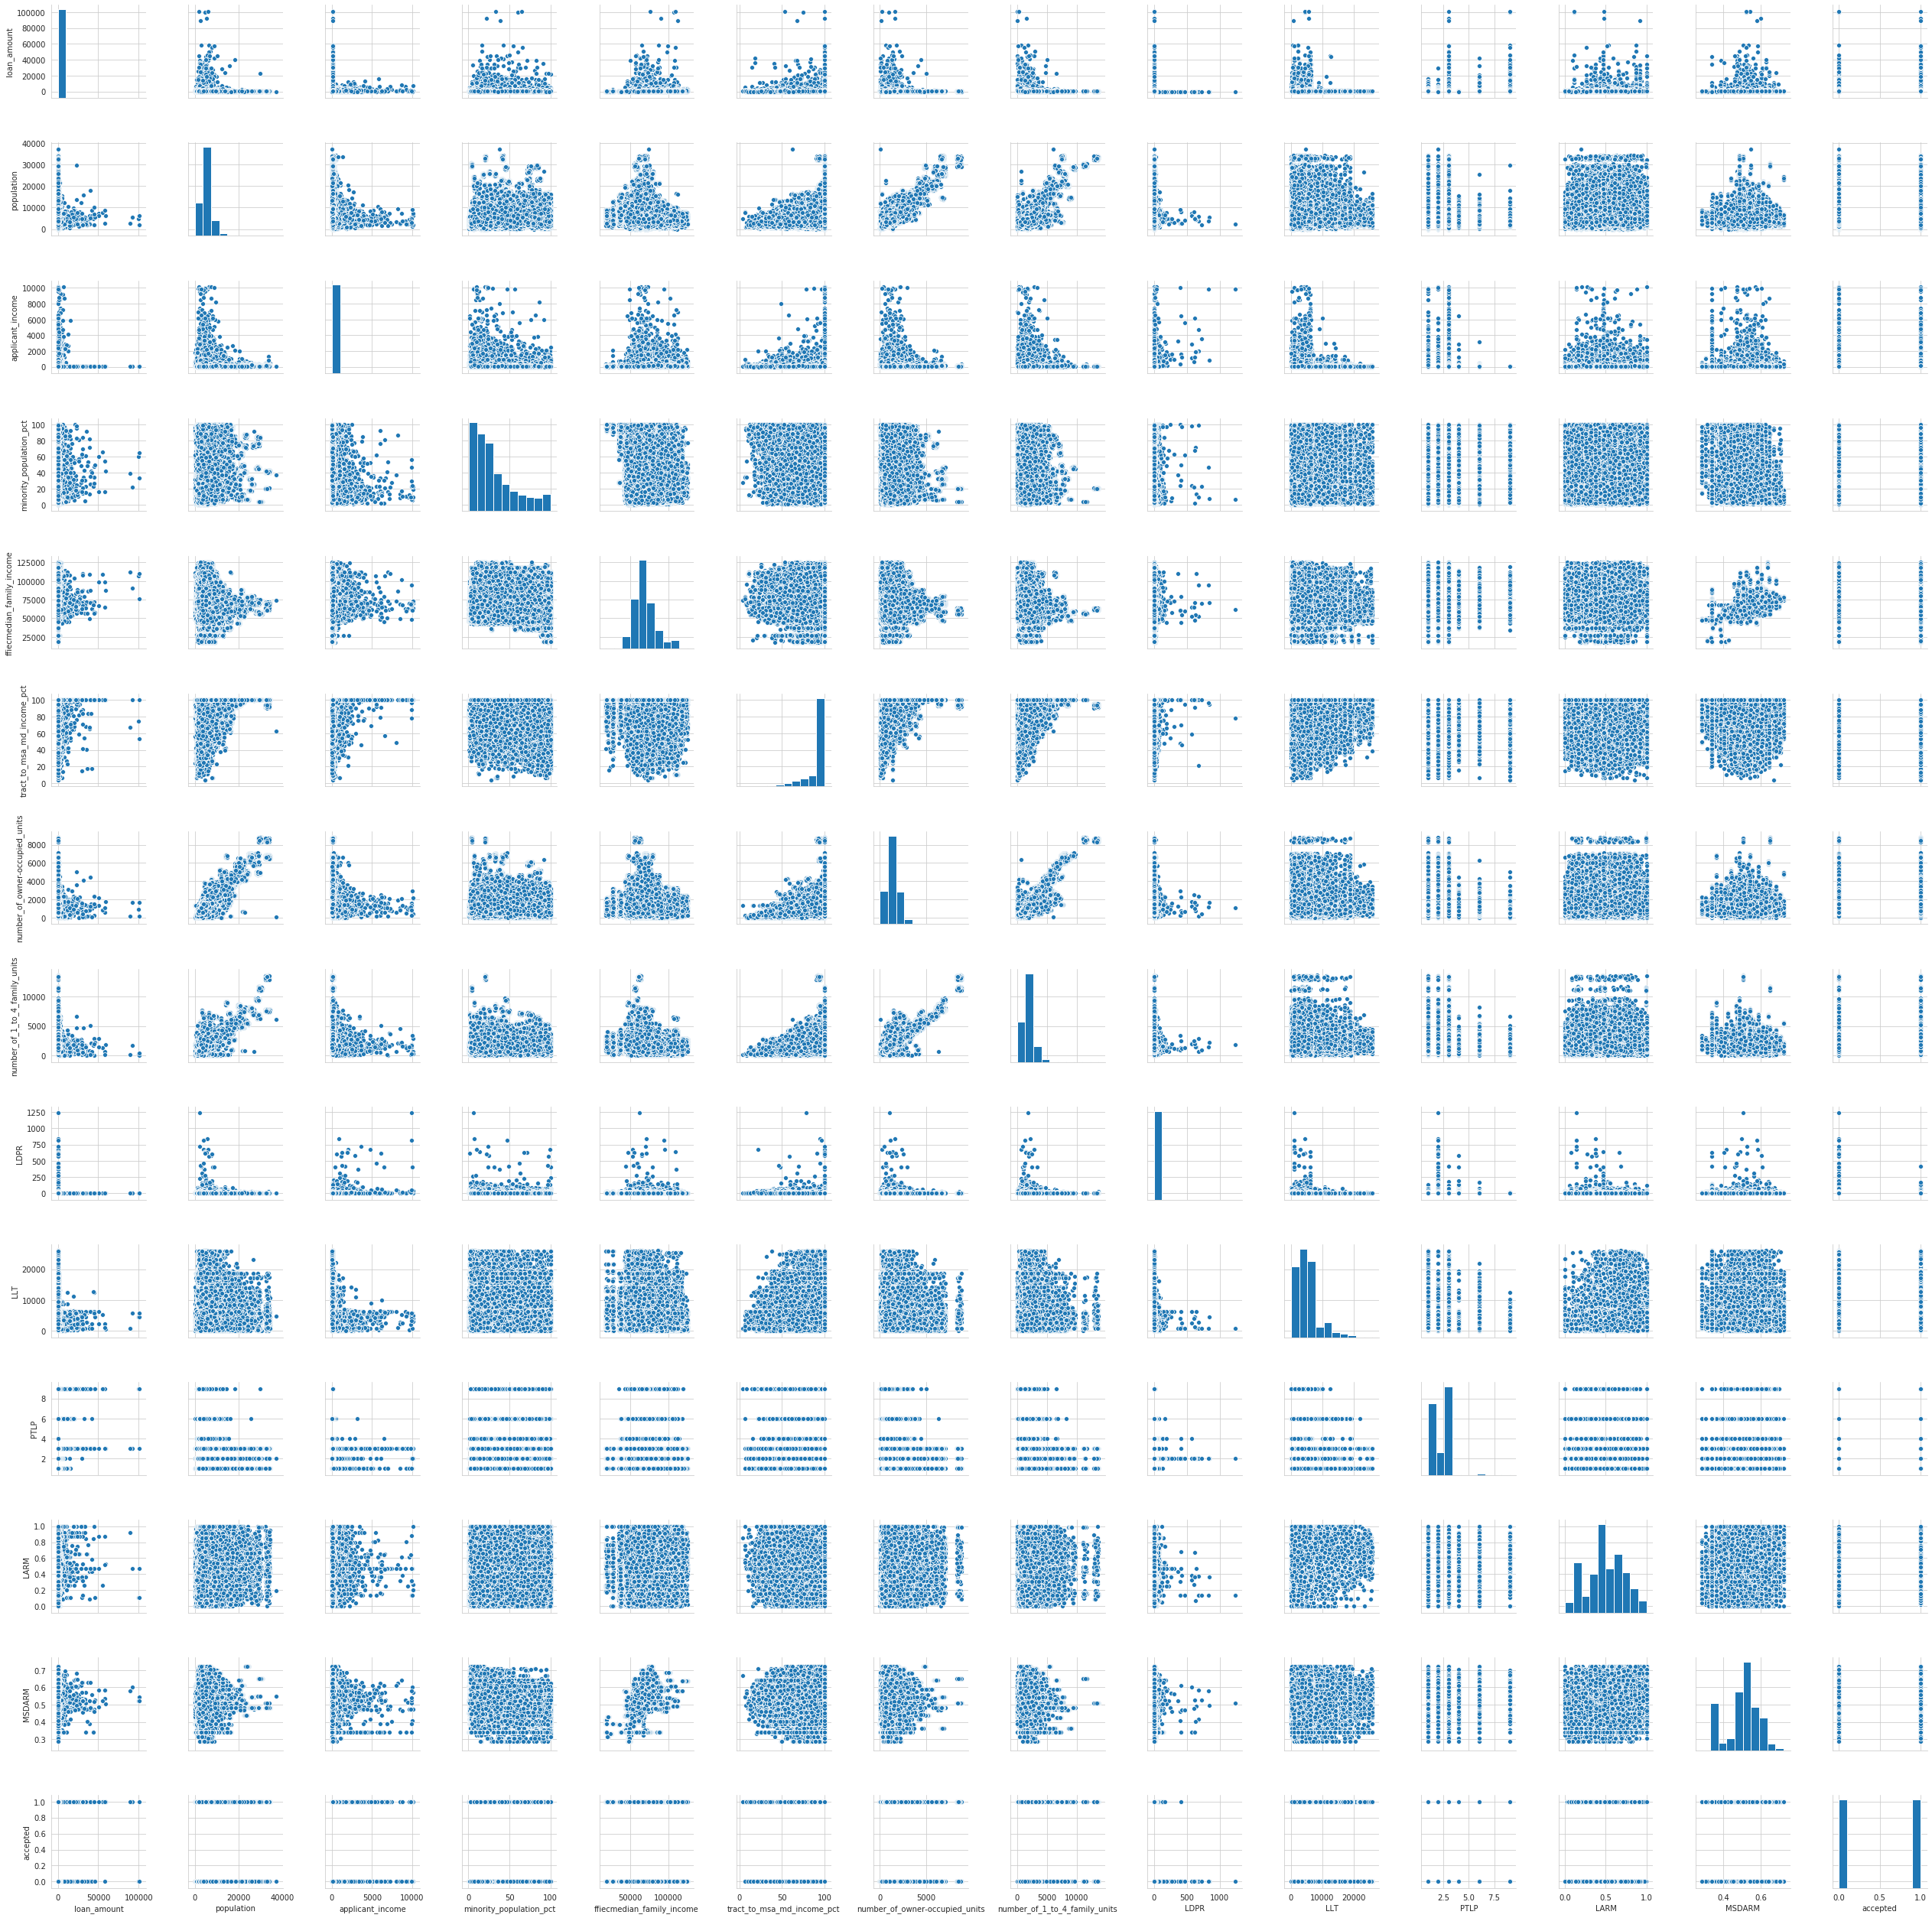

In [61]:
num_vars_=['loan_amount','population','applicant_income','minority_population_pct','ffiecmedian_family_income',
          'tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units',
         'LDPR','LLT','PTLP','LARM','MSDARM','accepted']
# pairwise plot for all variable origanal variable
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[num_vars_])
plt.savefig('image10.png')

<Figure size 864x720 with 0 Axes>

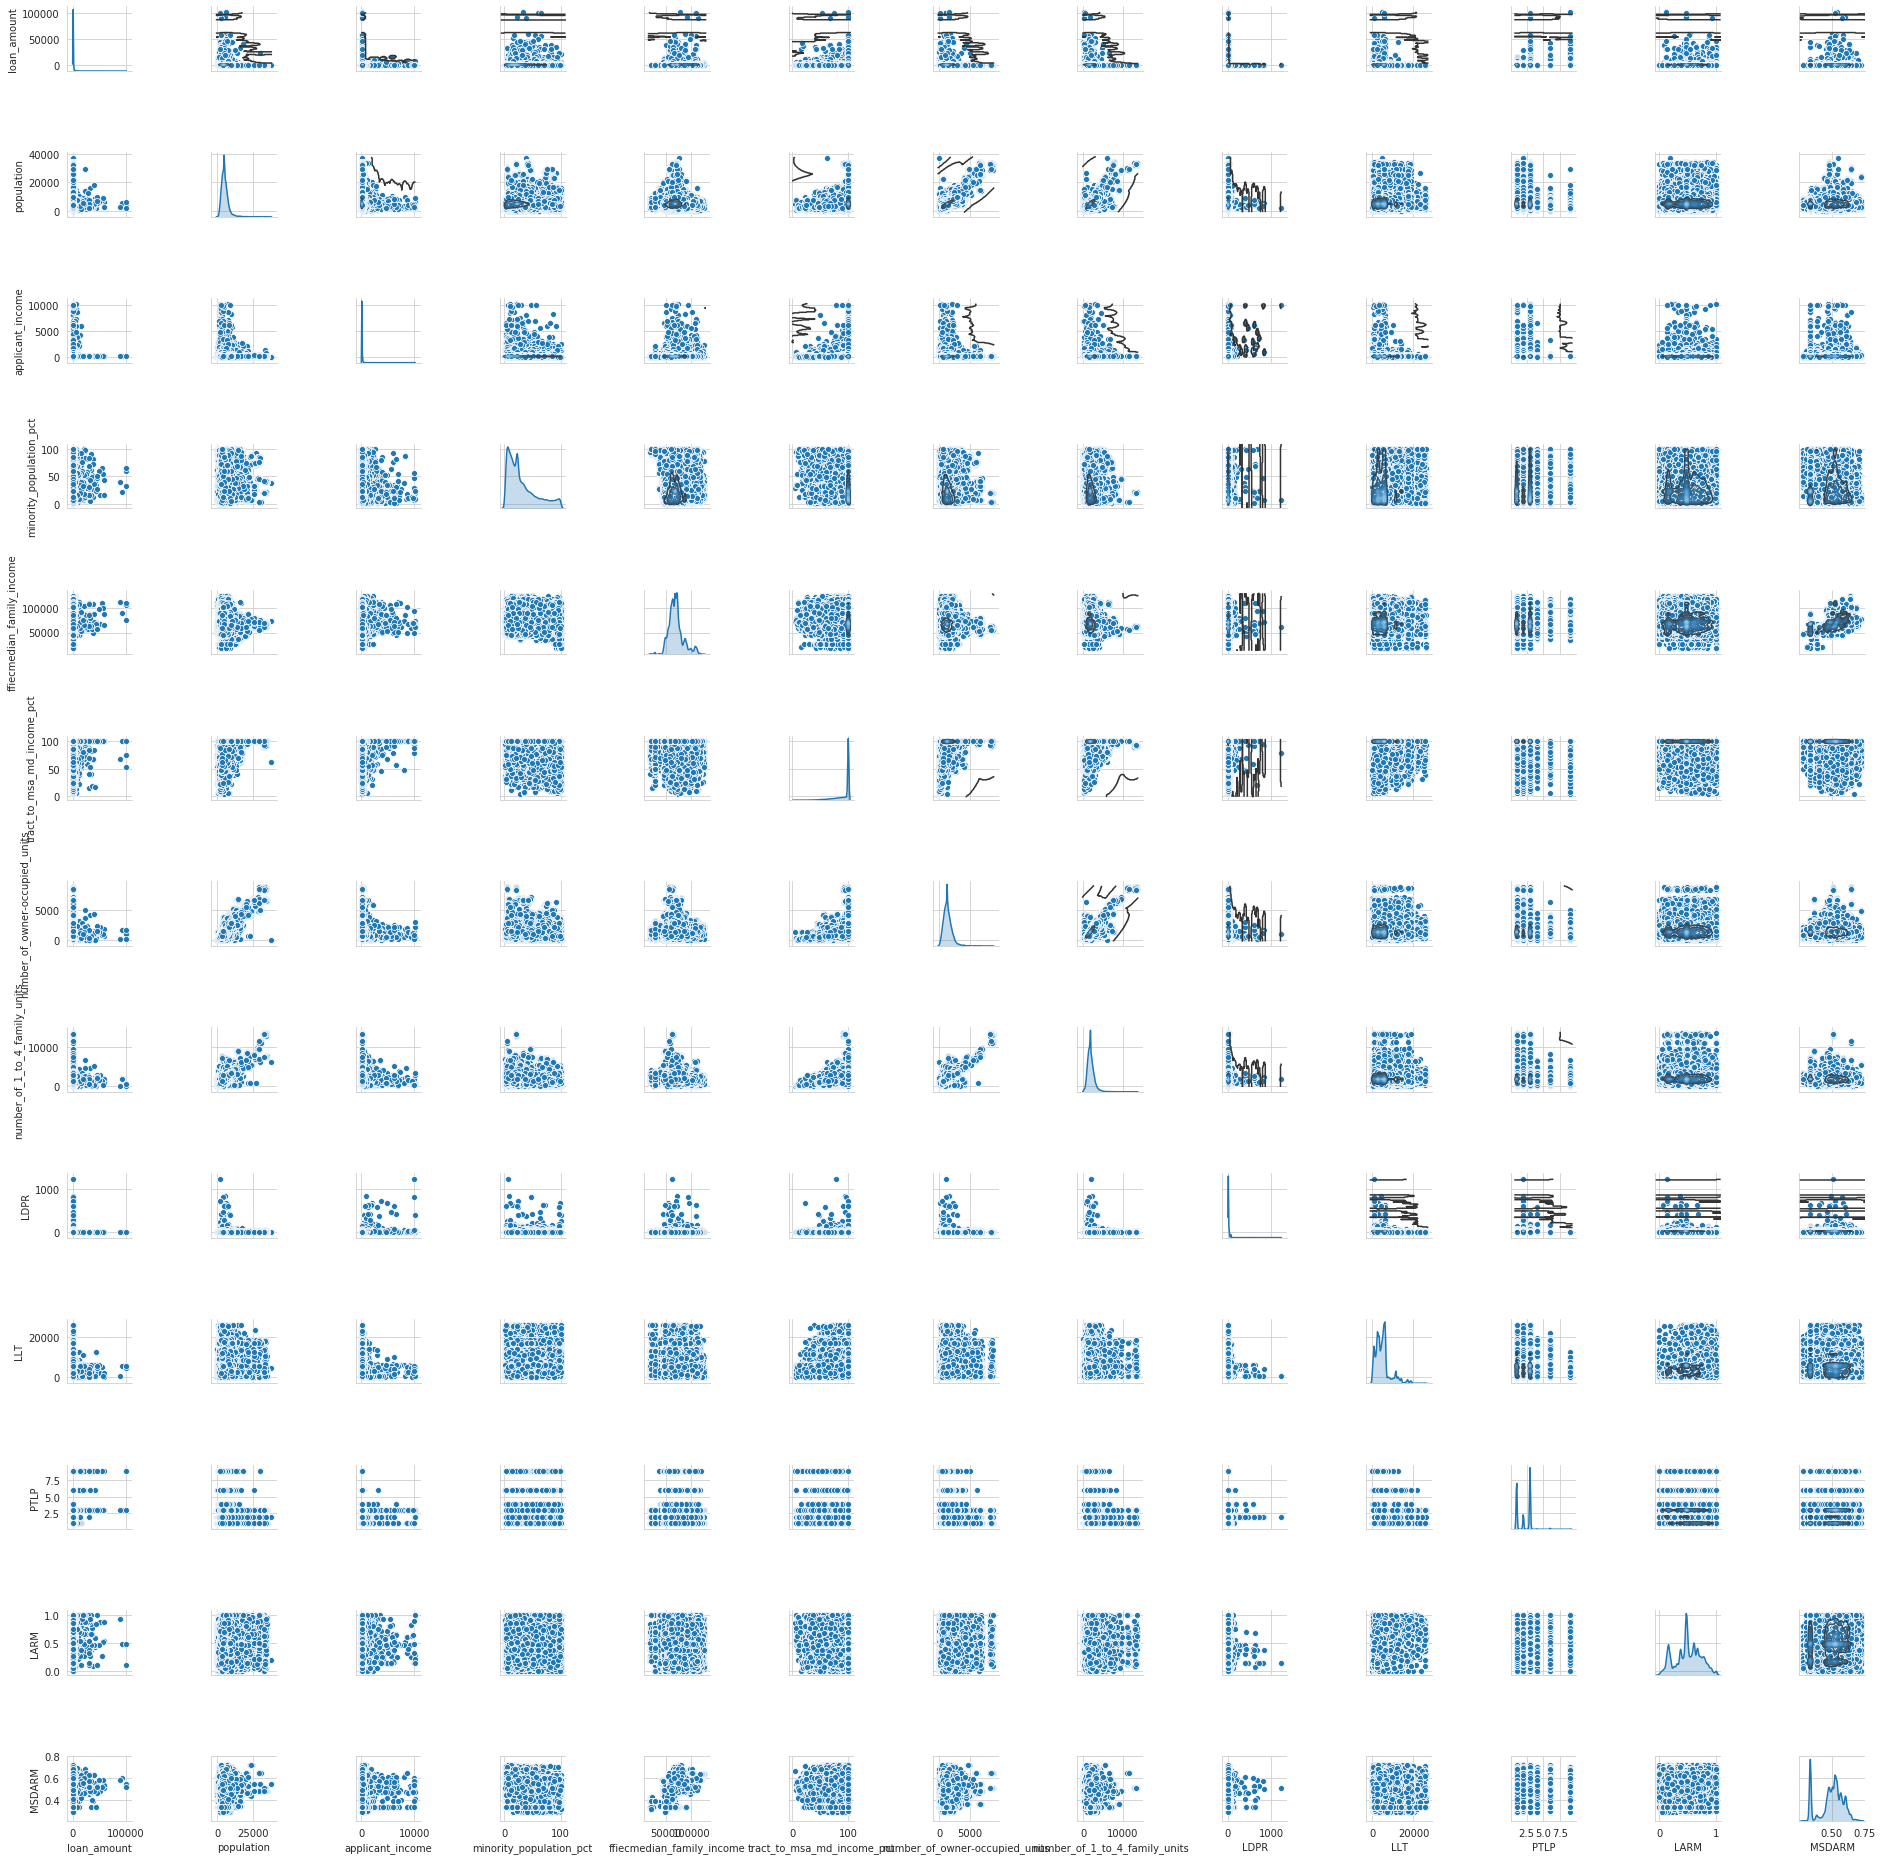

In [62]:
%config InlineBackend.figure_format = 'png' 
fig= plt.figure(figsize=(12,10))
sns.pairplot(data[num_vars], palette="Set2",diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")
plt.savefig('image11.png')

In [44]:
# checking for data types 
data.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
LDPR                              

In [45]:
final.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
LDPR                              float64
LLT                               

## Hypothesis & Develop

In [41]:
#importing libaries for prediction
import catboost as cb
import numpy as np
import numpy.random as nr
import pandas as pd
import hyperopt
import sys
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from frozendict import frozendict
import shap
import matplotlib.pylab as pl
shap.initjs()

### Pre-processing

In [42]:
# Seperating target variable from other variables. 
X = data.drop('accepted', axis=1)
y = data.accepted

In [43]:
# setting up categorical variables. 
categorical_features_indices= np.where(X.dtypes != np.float)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 20, 21, 23, 24])

In [44]:
#splitting the dataset into test and train sets 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(350000, 27) (350000,)
(150000, 27) (150000,)


In [45]:
y_train.head()

226114    1
435187    1
294452    0
427864    0
188822    1
Name: accepted, dtype: int64

In [46]:
X_train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  \
226114  226114          1              1             1          1   
435187  435187          1              1             3          1   
294452  294452          1              1             3          1   
427864  427864          1              1             2          1   
188822  188822          1              1             1          1   

        loan_amount  preapproval  msa_md  state_code  county_code  \
226114         52.0            3     383          25           49   
435187        291.0            3     358          32          259   
294452        692.0            3     350          38          233   
427864         49.0            3     205           2          124   
188822        212.0            2     305          47           68   

        applicant_ethnicity  applicant_race  applicant_sex  applicant_income  \
226114                    2               5              1              40.0   
435187                    2               5              1             195.0   
294452                    2               5              1             312.0   
427864                    2               5              1              40.0   
188822                    2               5              1              88.0   

        population  minority_population_pct  ffiecmedian_family_income  \
226114      4101.0                    6.760                    66693.0   
435187      3668.0                   34.298                   109805.0   
294452      5201.0                    9.346                    85651.0   
427864      2342.0                   11.994                    58003.0   
188822      4786.0                   17.743                    75595.0   

        tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
226114                      88.103                          1293.0   
435187                      99.295                           645.0   
294452                     100.000                          1642.0   
427864                     100.000                           700.0   
188822                     100.000                          1480.0   

        number_of_1_to_4_family_units  lender  co_applicant      LDPR   LLT  \
226114                         1647.0    2612         False  0.769231  2612   
435187                          642.0    3873          True  0.670103  3873   
294452                         1766.0    5316         False  0.450867  5316   
427864                         1366.0     878          True  0.816327   878   
188822                         1632.0    4791          True  0.415094  4791   

        PTLP      LARM    MSDARM  
226114     1  0.935484  0.464900  
435187     3  0.803419  0.523775  
294452     3  0.610101  0.627844  
427864     2  0.428756  0.462359  
188822     1  0.806499  0.544391

In [47]:
x_predict= final
x_predict.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          2              1             3          1        115.0   
1       1          1              1             1          1        252.0   
2       2          1              1             1          1        270.0   
3       3          2              1             1          1        179.0   
4       4          2              1             1          1         36.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3     101          16          276                    2   
1            2      87          20           68                    2   
2            1      -1          -1           -1                    2   
3            2     376          20           11                    2   
4            2     254          48          156                    3   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              74.0      6329.0   
1               5              1             107.0      2473.0   
2               1              2             119.0      4975.0   
3               2              2              44.0      4795.0   
4               6              3              32.0      5246.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   59.536                    69889.0   
1                    8.050                    65313.0   
2                   22.901                    67526.0   
3                   29.676                    57766.0   
4                    5.110                    63332.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                       85.78                          1874.0   
1                      100.00                           947.0   
2                      100.00                          1327.0   
3                      100.00                          1426.0   
4                      100.00                          1452.0   

   number_of_1_to_4_family_units  lender  co_applicant      LDPR    LLT  PTLP  \
0                         2410.0    3791          True  0.643478   7582     3   
1                         1214.0    2839          True  0.424603   2839     1   
2                         1753.0    4701         False  0.440741   4701     1   
3                         1765.0    2153          True  0.245810   4306     1   
4                         2092.0    5710         False  0.888889  11420     1   

       LARM    MSDARM  
0  0.785178  0.495576  
1  0.371434  0.607497  
2  0.195064  0.338949  
3  0.817891  0.527134  
4  0.489632  0.547771

In [48]:
# function to calculate the scores
def score_model(probs, threshold):
    return np.array([1 if x> threshold else 0 for x in probs[:, 1]])

In [49]:
# function to calculate the mertics of our model, metric such as auc, accuracy, precision etc. 
def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion Matrix')
    print('                 Score Positive    Score Negative')
    print('Actual Positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual Negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro Precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro Recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num Case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [50]:
# function to plot AUC of model after prediction
def plot_auc(labels, probs, threshold):
    ## compute the false postive rate, true positive rate  and threshold  along with the AUC 
    pl.style.use('ggplot')
    scores = score_model(probs, threshold)
    accuracy= sklm.accuracy_score(labels, scores)
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1]) 
    auc = sklm.auc(fpr, tpr)

    ## plot the result 
    plt.title('Reciever Operating Charateristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' %auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate') 
    plt.xlabel('False Positive Rate')
    plt.title("Recieve Operating Characteristic (Accuracy= %0.2f)" %accuracy)
    plt.show()


In [51]:
# employing and training catboost classifier
from catboost import CatBoostClassifier
clf_cb= CatBoostClassifier(iterations=2500, depth=10,logging_level='Silent',
                           learning_rate=0.01,eval_metric='Accuracy',use_best_model=True, random_seed=42)
clf_cb.fit(X_test, y_test, cat_features= categorical_features_indices, eval_set=(X_test,y_test))

In [52]:
# testing the model after training and printing the metrics
probabilities= clf_cb.predict_proba(data= X_test) 
print_metrics(y_test, probabilities, 0.51)

                 Confusion Matrix
                 Score Positive    Score Negative
Actual Positive     54448             20183
Actual Negative     13663             61706

Accuracy        0.77
AUC             0.86
Macro Precision 0.78
Macro Recall    0.77
 
           Positive      Negative
Num Case    74631         75369
Precision    0.80          0.75
Recall       0.73          0.82
F1           0.76          0.78


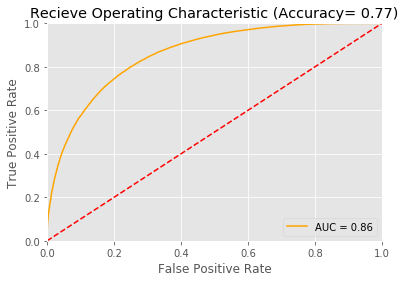

In [53]:
#plotting the AUC of the model after prediction
plot_auc(y_test, probabilities, 0.51)

In [73]:
# modifing some parameters of the model and training the model
from catboost import CatBoostClassifier
clf_cb= CatBoostClassifier(iterations=2500, depth=6,logging_level='Silent',
                           learning_rate=0.3548362548720143,eval_metric='Accuracy',l2_leaf_reg=2.683829844728577,
                          use_best_model=True, random_seed=42)
clf_cb.fit(X_test, y_test, cat_features= categorical_features_indices, eval_set=(X_test,y_test))

In [74]:
# testing the model after training and printing the metrics
probabilities= clf_cb.predict_proba(data= X_test) 
print_metrics(y_test, probabilities, 0.51)

                 Confusion Matrix
                 Score Positive    Score Negative
Actual Positive     58500             16131
Actual Negative     12622             62747

Accuracy        0.81
AUC             0.89
Macro Precision 0.81
Macro Recall    0.81
 
           Positive      Negative
Num Case    74631         75369
Precision    0.82          0.80
Recall       0.78          0.83
F1           0.80          0.81


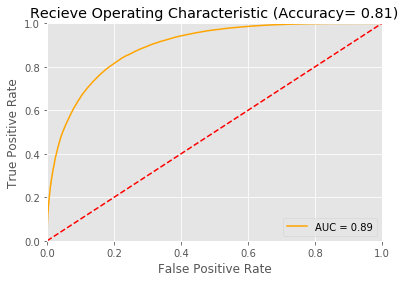

In [77]:
#plotting the AUC of the model after prediction
plot_auc(y_test, probabilities, 0.50)

tunning and optimizing catboost algorithm 

In [55]:
class UAClassifierObjective(object):
    def __init__(self, dataset, const_params, fold_count):
        self._dataset = dataset
        self._const_params = const_params.copy()
        self._fold_count = fold_count
        self._evaluated_count = 0
        
    def _to_catboost_params(self, hyper_params):
        return {
            'learning_rate': hyper_params['learning_rate'],
            'depth': hyper_params['depth'],
            'l2_leaf_reg': hyper_params['l2_leaf_reg']}
    
    # hyperopt optimizes an objective using `__call__` method (e.g. by doing 
    # `foo(hyper_params)`), so we provide one
    def __call__(self, hyper_params):
        # join hyper-parameters provided by hyperopt with hyper-parameters 
        # provided by the user
        params = self._to_catboost_params(hyper_params)
        params.update(self._const_params)
        
        print('evaluating params={}'.format(params), file=sys.stdout)
        sys.stdout.flush()
        
        # we use cross-validation for objective evaluation, to avoid overfitting
        scores = cb.cv(
            pool=self._dataset,
            params=params,
            fold_count=self._fold_count,
            partition_random_seed=20181224,
            verbose=False)
        
        # scores returns a dictionary with mean and std (per-fold) of metric 
        # value for each cv iteration, we choose minimal value of objective 
        # mean (though it will be better to choose minimal value among all folds)
        # because noise is additive
        min_mean_auc = np.min(scores['test-AUC-mean'])
        print('evaluated score={}'.format(min_mean_auc), file=sys.stdout)
        
        self._evaluated_count += 1
        print('evaluated {} times'.format(self._evaluated_count), file=sys.stdout)
        
        # negate because hyperopt minimizes the objective
        return {'loss': -min_mean_auc, 'status': hyperopt.STATUS_OK}

In [56]:
def find_best_hyper_params(dataset, const_params, max_evals=100):    
    # we are going to optimize these three parameters, though there are a lot more of them (see CatBoost docs)
    parameter_space = {
        'learning_rate': hyperopt.hp.uniform('learning_rate', 0.2, 1.0),
        'depth': hyperopt.hp.randint('depth', 7),
        'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 1, 10)}
    objective = UAClassifierObjective(dataset=dataset, const_params=const_params, fold_count=6)
    trials = hyperopt.Trials()
    best = hyperopt.fmin(
        fn=objective,
        space=parameter_space,
        algo=hyperopt.rand.suggest,
        max_evals=max_evals,
        rstate=np.random.RandomState(seed=20181224))
    return best

def train_best_model(X, y, const_params, max_evals=100, use_default=False):
    # convert pandas.DataFrame to catboost.Pool to avoid converting it on each 
    # iteration of hyper-parameters optimization
    dataset = cb.Pool(X, y, cat_features=categorical_features_indices)
    
    if use_default:
        # pretrained optimal parameters
        best = {
            'learning_rate': 0.4234185321620083, 
            'depth': 5, 
            'l2_leaf_reg': 9.464266235679002}
    else:
        best = find_best_hyper_params(dataset, const_params, max_evals=max_evals)
            
    # merge subset of hyper-parameters provided by hyperopt with hyper-parameters 
    # provided by the user
    hyper_params = best.copy()
    hyper_params.update(const_params)
    
    # drop `use_best_model` because we are going to use entire dataset for 
    # training of the final model
    hyper_params.pop('use_best_model', None)
    
    model = cb.CatBoostClassifier(**hyper_params)
    model.fit(dataset, verbose=False)
    
    return model, hyper_params

In [57]:
# make it True if your want to use GPU for training
import time
start=time.time()

have_gpu = False
# skip hyper-parameter optimization and just use provided optimal parameters
use_optimal_pretrained_params = False
# number of iterations of hyper-parameter search
hyperopt_iterations = 50

const_params = frozendict({
    'task_type': 'GPU' if have_gpu else 'CPU',
    'loss_function': 'Logloss',
    'eval_metric': 'AUC', 
    'custom_metric': ['AUC'],
    'iterations': 100,
    'random_seed': 20181224})

model, params = train_best_model(
    X_train, y_train, 
    const_params, 
    max_evals=hyperopt_iterations, 
    use_default=use_optimal_pretrained_params)
print('best params are {}'.format(params), file=sys.stdout)
end = time.time()
print(end-start)

evaluating params={'learning_rate': 0.8370106458894697, 'depth': 0, 'l2_leaf_reg': 8.835837790286535, 'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 100, 'random_seed': 20181224}
evaluated score=0.5
evaluated 1 times
evaluating params={'learning_rate': 0.8414600898588487, 'depth': 3, 'l2_leaf_reg': 3.841780975474402, 'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 100, 'random_seed': 20181224}
evaluated score=0.729527707220357
evaluated 2 times
evaluating params={'learning_rate': 0.4234185321620083, 'depth': 5, 'l2_leaf_reg': 9.464266235679002, 'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 100, 'random_seed': 20181224}
evaluated score=0.76147291075481
evaluated 3 times
evaluating params={'learning_rate': 0.22471545632474588, 'depth': 3, 'l2_leaf_reg': 7.1682035345674, 'task_type': 'CPU', 'loss_functi

best params are {'depth': 6, 'l2_leaf_reg': 2.683829844728577, 'learning_rate': 0.3548362548720143, 'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 100, 'random_seed': 20181224}
14302.153777837753


In [58]:
# testing the model after training and printing the metrics
probabilities = model.predict_proba(data=X_test) 
print_metrics(y_test, probabilities, 0.51)

                 Confusion Matrix
                 Score Positive    Score Negative
Actual Positive     51550             23081
Actual Negative     17527             57842

Accuracy        0.73
AUC             0.81
Macro Precision 0.73
Macro Recall    0.73
 
           Positive      Negative
Num Case    74631         75369
Precision    0.75          0.71
Recall       0.69          0.77
F1           0.72          0.74


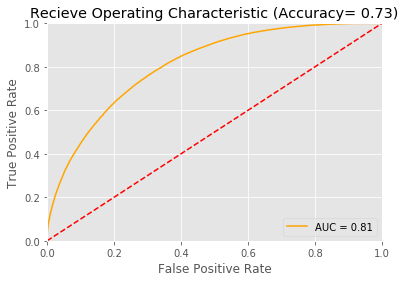

In [70]:
#plotting the AUC of the model after prediction
plot_auc(y_test, probabilities, 0.50)

In [60]:
final_score = clf_cb.predict(data=x_predict)
final_score= final_score.astype(np.int)
submit= pd.DataFrame({'row_id':x_predict['row_id'],'accepted':final_score})
submit.to_csv('submission.csv', index=False)

In [61]:
#printing feature importance
model.get_feature_importance(prettified=True)

Feature Index  Importances
0                             LARM    28.223704
1                      county_code    21.987793
2                       state_code     6.845232
3                 applicant_income     6.675784
4                             PTLP     5.610919
5                             LDPR     4.630684
6                      preapproval     3.614446
7                              LLT     3.023611
8                      loan_amount     2.664627
9                   applicant_race     2.575515
10                          lender     2.378800
11                    loan_purpose     2.018103
12                       loan_type     1.380951
13                          MSDARM     1.290075
14                          msa_md     0.981059
15             applicant_ethnicity     0.973570
16         minority_population_pct     0.934595
17                       occupancy     0.809096
18       ffiecmedian_family_income     0.801456
19                    co_applicant     0.792534
20      tract_to_msa_md_income_pct     0.455560
21   number_of_1_to_4_family_units     0.354423
22                      population     0.326532
23                   applicant_sex     0.285890
24  number_of_owner-occupied_units     0.252550
25                   property_type     0.112490
26                          row_id     0.000000

In [62]:
#calculating feature importance
shap_values = model.get_feature_importance(cb.Pool(X, y, cat_features=categorical_features_indices), type='ShapValues')

In [63]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

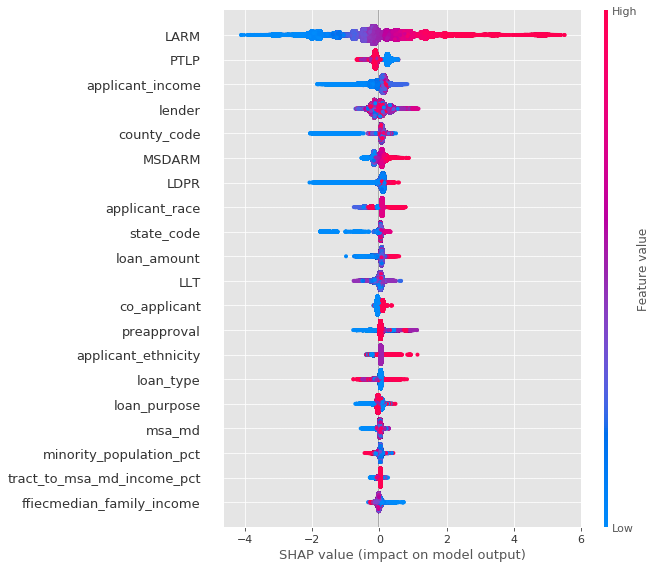

In [64]:
# Plot the Feature Importance
shap.summary_plot(shap_values, X)

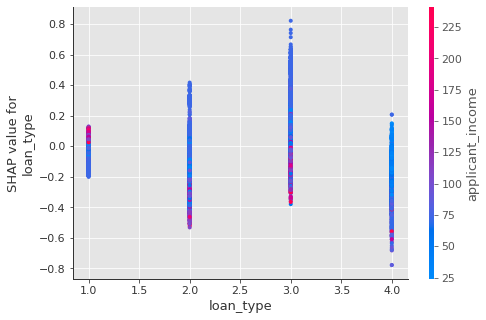

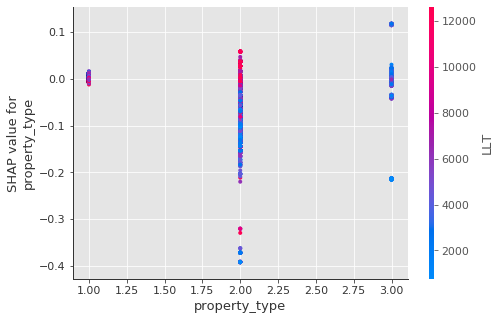

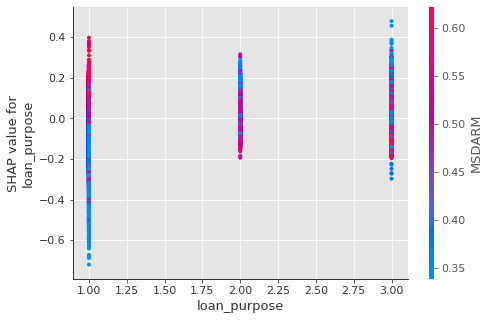

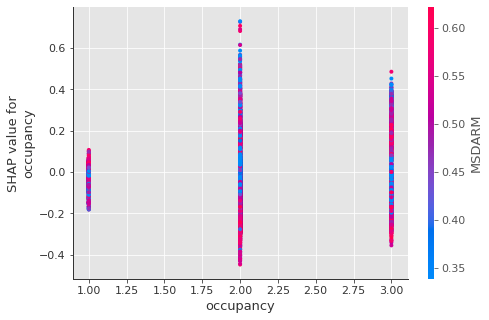

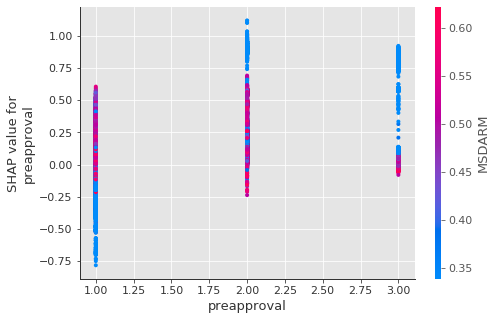

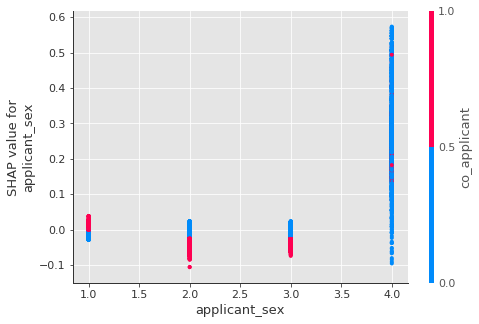

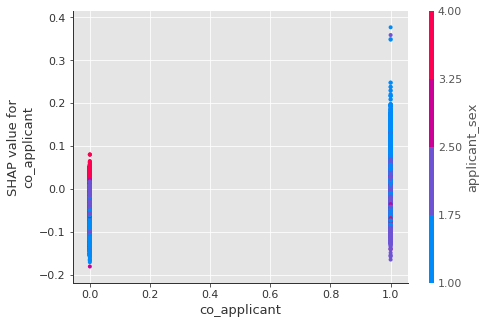

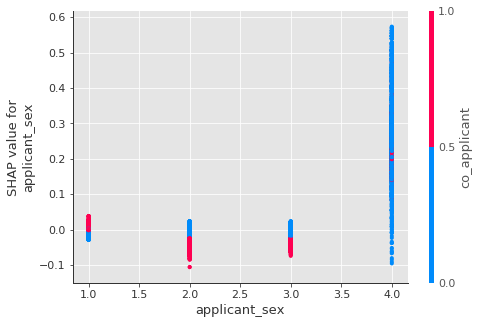

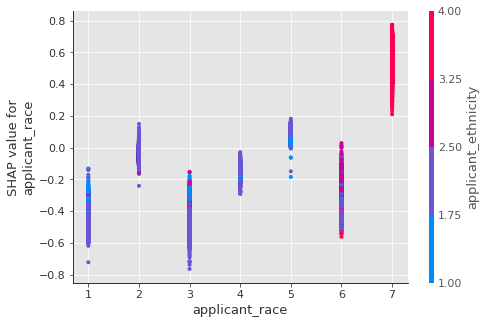

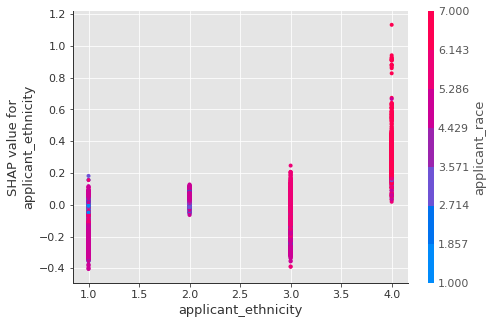

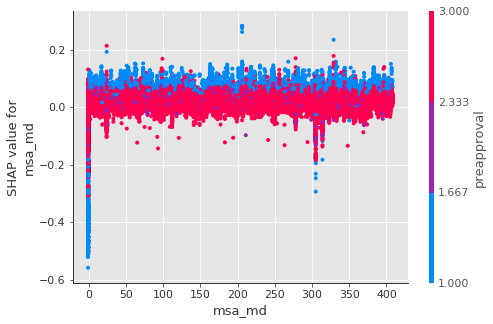

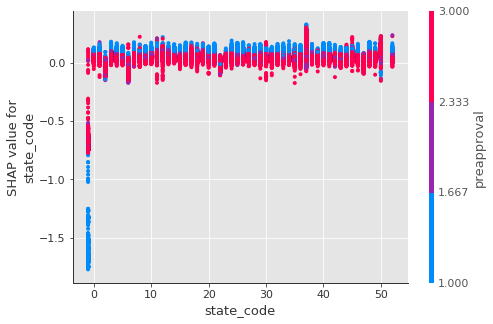

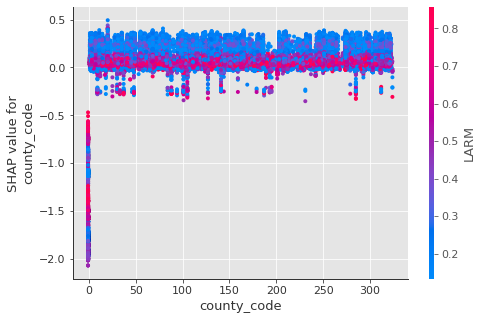

In [65]:
# function for shap plots. ie create a SHAP dependence plot to show the effect of a single feature 
# across the whole dataset
cat_features= data[cat_vars]

def plot_shap(cat_cols):
    for col in cat_cols:
        shap.dependence_plot(col, shap_values, X)

# plotting data for categorical variables 
plot_shap(cat_features)

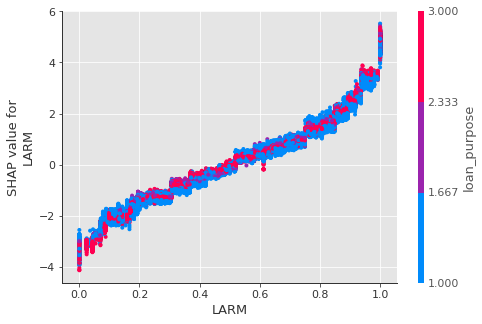

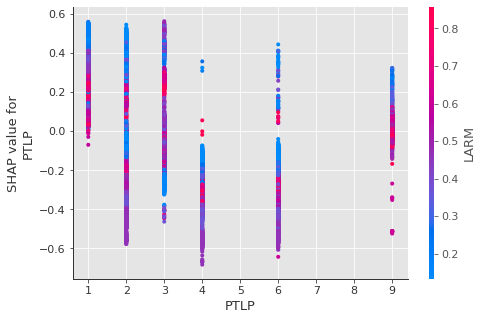

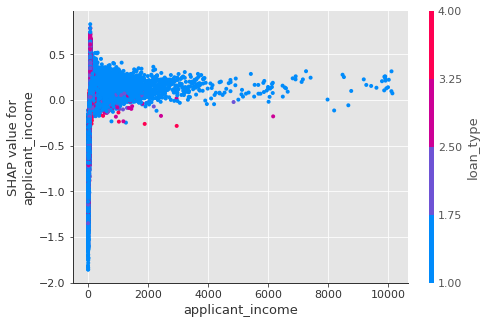

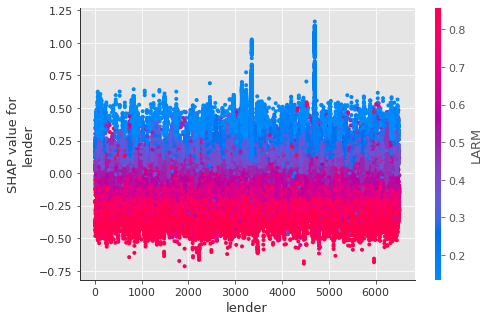

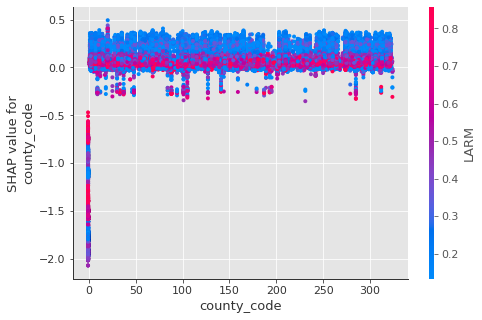

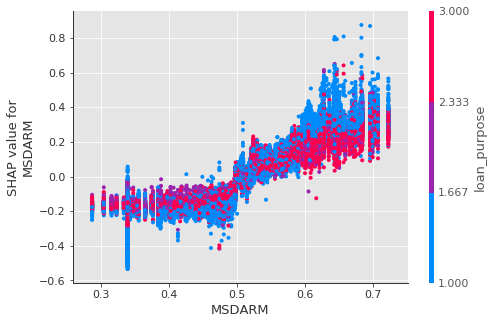

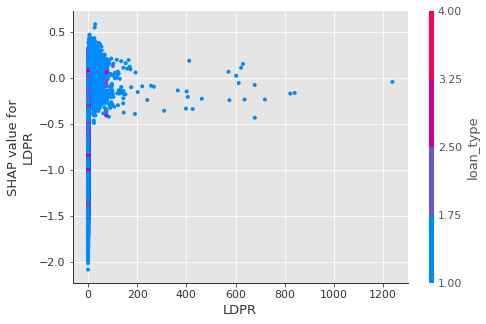

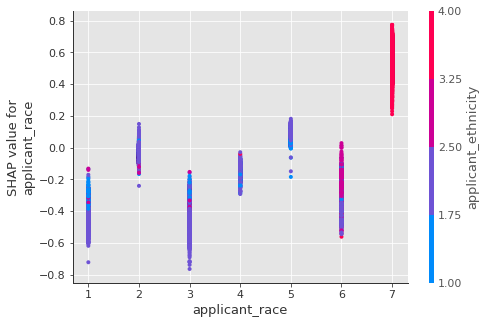

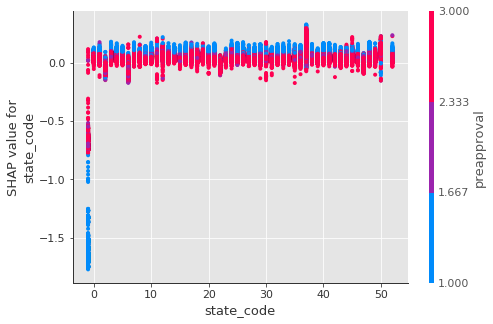

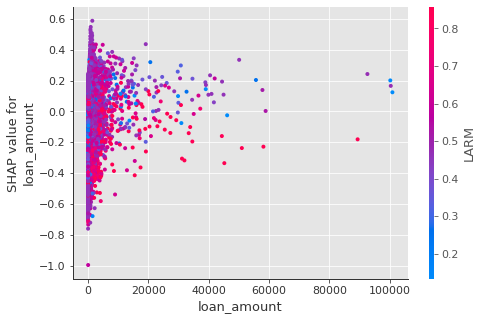

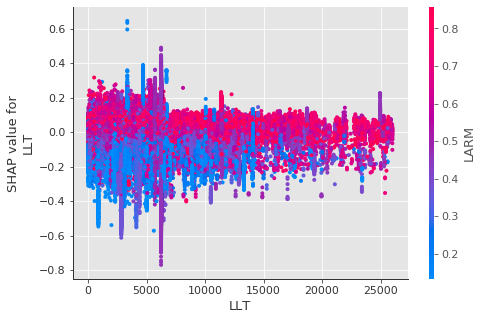

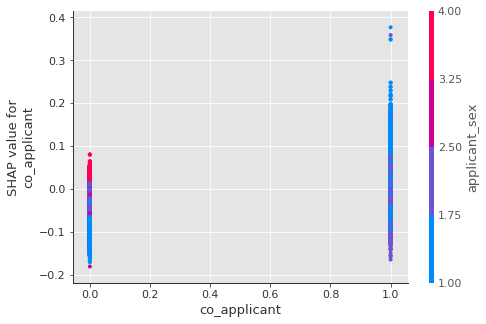

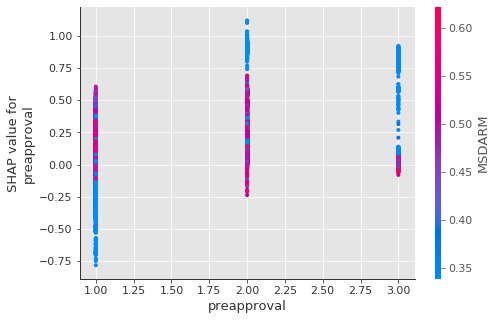

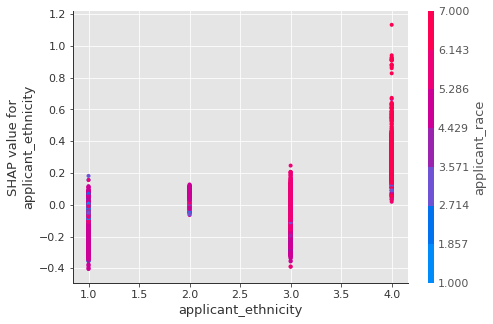

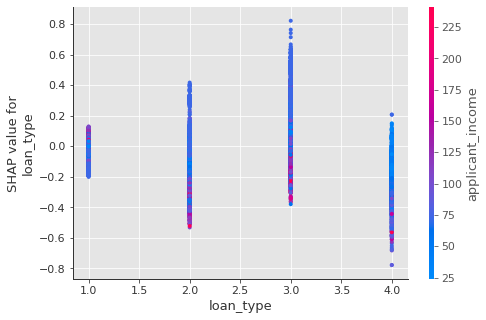

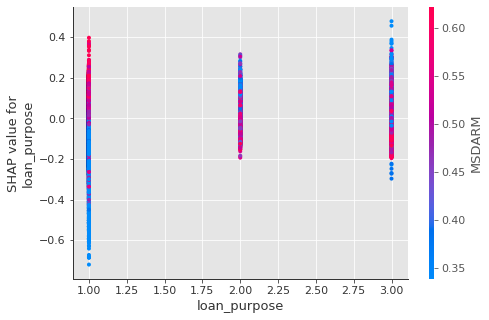

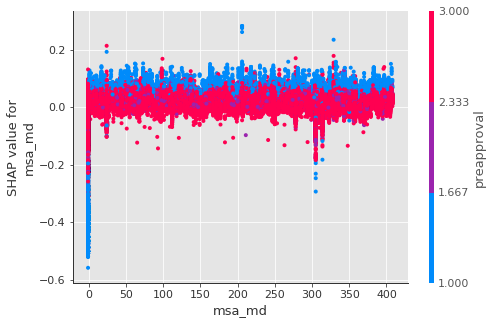

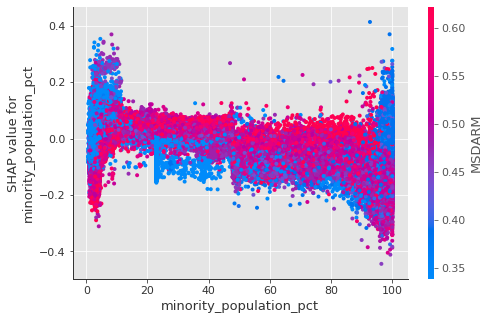

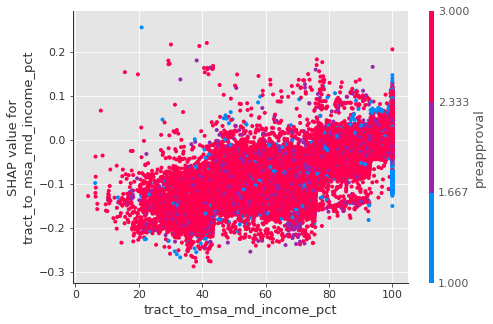

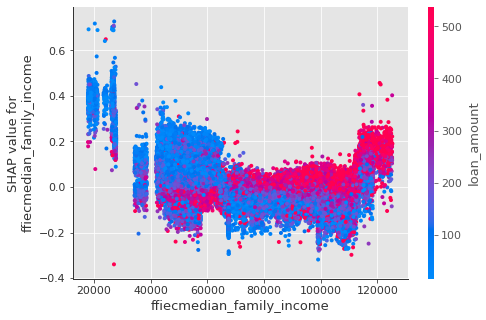

In [66]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, X)

In [67]:
shap_values = clf_cb.get_feature_importance(cb.Pool(X, y, cat_features=categorical_features_indices), type='ShapValues')

In [68]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

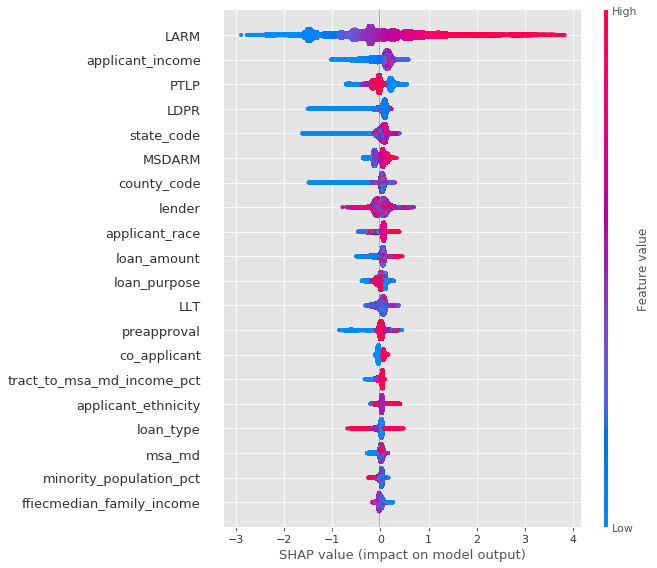

In [69]:
shap.summary_plot(shap_values, X)